# **<u>Computer Vision - Malaria Detection Classification - By David Salako.</u>**


**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Context</font>**

Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans through the bites of infected female Anopheles mosquitoes. 

<br>

There are 5 parasite species that cause malaria in humans, and 2 of these species – P. falciparum and P. vivax – pose the greatest threat. P. falciparum is the deadliest malaria parasite and the most prevalent on the African continent. P. vivax is the dominant malaria parasite in most countries outside of sub-Saharan Africa. 

<br>

The parasites enter the blood and begin damaging red blood cells (RBCs) that carry oxygen, which can result in respiratory distress and other complications. The lethal parasites can stay alive for more than a year in a person’s body without showing any symptoms. Therefore, late treatment can cause complications and could even be fatal. 

<br>

The first symptoms – fever, headache and chills – usually appear 10–15 days after the infective mosquito bite and may be mild and difficult to recognize as malaria. Left untreated, P. falciparum malaria can progress to severe illness and death within a period of 24 hours.

<br>

Almost 50% of the world’s population is in danger from malaria. There were more than 229 million malaria cases and 400,000 malaria-related deaths reported over the world in 2019. Children under 5 years of age are the most vulnerable population group affected by malaria; in 2019 they accounted for 67% of all malaria deaths worldwide.

<br>



Development of Malaria Parasite(s) Life-Cycle.

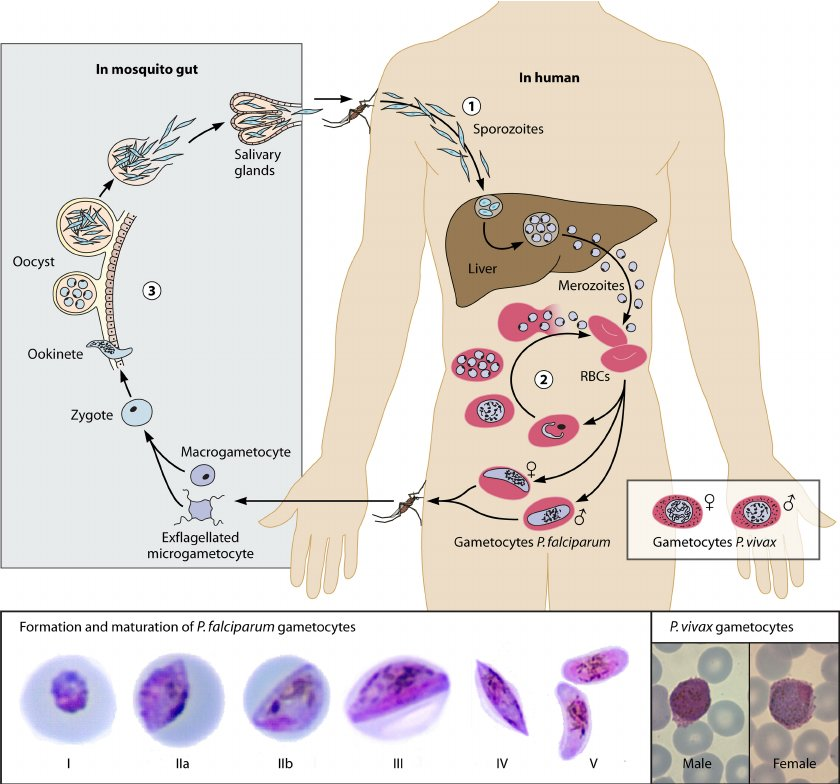

Image Source: World Health Organization.

Traditional diagnosis of malaria in the laboratory requires careful inspection by an experienced professional to discriminate between healthy and infected red blood cells. It is a tedious, time-consuming process, and the diagnostic accuracy (which heavily depends on human expertise) can be adversely impacted by inter-observer variability. 

<br>

<b>An automated system can help with the early and accurate detection of malaria. Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have consistently shown higher accuracy than manual classification. It would therefore be highly beneficial to propose a method that performs malaria detection using Deep Learning Algorithms.
</b>

<br>

## **<font color=purple>Objective</font>**

Build an efficient computer vision model to detect malaria. The model should identify whether the image of a red blood cell is that of one infected with malaria or not, and classify the same as parasitized or uninfected, respectively.

<br>

## **<font color=purple>About the Dataset</font>**

The project is inspired from a dataset from Kaggle and downloaded from the Olympus platform on Great Learning. 

Here are <b> 27198 </b> colored images of red blood cells that contain parasitized and uninfected instances, where:

* The parasitized cells contain the Plasmodium parasite.
* The uninfected cells are free of the Plasmodium parasites but could contain other impurities.

The images are already split into training and testing folders. Each folder has two more subfolders named <b>"parasitized"</b> and <b>"uninfected"</b>. These folders have colored images of the respective red blood cell classes.

<br>

## **<font color=purple>Problem Statement</font>**

To build a classification model that can take images of red blood cells as input and can classify them into one of the following types of diagnosis:
<b>malaria present</b> and <b>no malaria</b>.


**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Retrieving and Exploring the Dataset.</font>** 

### <b>Mounting the Drive</b>

In [1]:
# Mounting the drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**<font color=blue>==============================================================================================================================================================================================================================</font>**

### <b>Loading libraries</b>

In [2]:
# Importing libraries required to load the data.

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image # Image.


# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D # NN Layers.

from keras.callbacks import EarlyStopping  # Regularzation method to prevent the overfitting.
from keras.callbacks import ModelCheckpoint # Callback for Storing model amd weights.
from keras.preprocessing.image import ImageDataGenerator # Image Augumentation Libraries.
from keras.callbacks import ReduceLROnPlateau # Learning Rate callback. 
from tensorflow.keras.optimizers import RMSprop,Adam # Optimiers for optimizing the model.

# from tensorflow.keras.models import Sequential # Sequential API for sequential model. 

from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing the different layers. 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding.
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers # Optimizers.
from tensorflow.keras.models import load_model # Loading the pre-trained model.

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img


# Libraries to import decision tree classifier and different ensemble classifiers

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

# to ignore warnings.

import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it.

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from IPython.display import display, HTML,Markdown

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### <b>Loading the Dataset</b>

In [3]:
# Storing the path of the data file from the Google drive.

path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file.

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

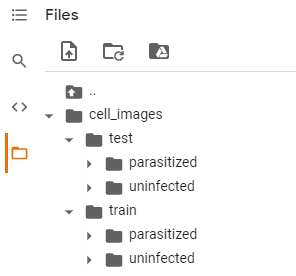

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [4]:
# Storing the path of the extracted "train" folder.

train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size.

SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays.

train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized).

train_labels = []

In [5]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder.

for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder.

    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            # Opening each image using the path of that image.

            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64,64).

            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above.

            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images.

            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

# Converting lists to arrays.

train_images = np.array(train_images)
train_labels = np.array(train_labels)

np.save('Training Cells' , train_images)
np.save('Training Labels' , train_labels)

In [6]:
# Storing the path of the extracted "test" folder.

test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size).

SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays.

test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized).

test_labels = []

In [7]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder.

for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder.

    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            # Opening each image using the path of that image.

            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64,64).

            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above.

            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images.

            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays.

test_images = np.array(test_images)
test_labels = np.array(test_labels)

np.save('Testing Cells' , test_images)
np.save('Testing Labels' , test_labels)

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### <b>Shape of the Data</b>

In [8]:
# Shape of the training image and the training label datasets respectively.

print('Training Cells : {} | Training Labels : {}'.format(train_images.shape, train_labels.shape))

Training Cells : (24958, 64, 64, 3) | Training Labels : (24958,)


**Observations:**

* Number images in the train dataset is 24598.
* Each image is of 64x64 pixel and is a color image (RGB).

In [9]:
# Shape of the testing image and the testing label datasets respectively.

print('Testing Cells : {} | Testing Labels : {}'.format(test_images.shape, test_labels.shape))

Testing Cells : (2600, 64, 64, 3) | Testing Labels : (2600,)


**Observations:**

* Number images in the train dataset is 2600.
* Each image is of 64x64 pixel and is a color image (RGB).

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Removing some corrupted files from the red blood cells dataset.**

In [10]:
import os

os.remove('/content/cell_images/train/parasitized/Thumbs.db')

In [11]:
os.remove('/content/cell_images/train/uninfected/Thumbs.db')

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Visualize Random Examples of the Red Blood Cell Images.**

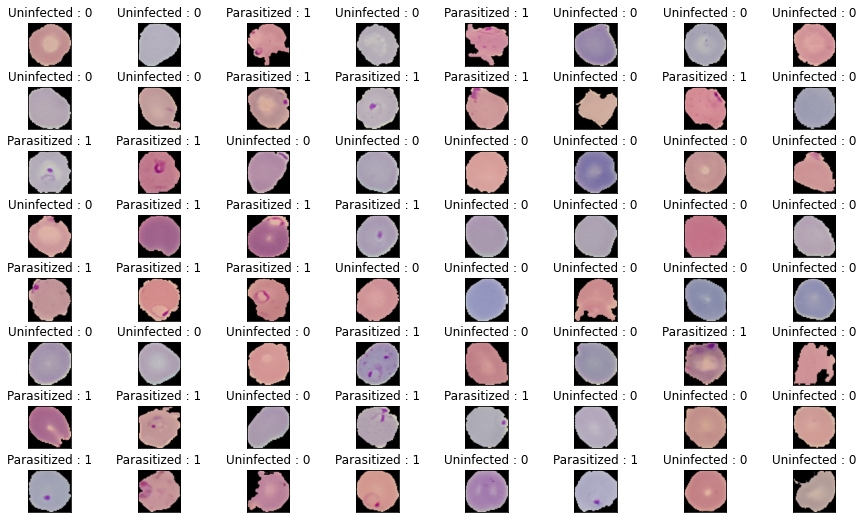

In [12]:
# Display random examples of 64 cells that are parasitized (label value: 1) and unifnected (label value: 0).

plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(64):
    n += 1 
    r = np.random.randint(0 , train_images.shape[0] , 1)
    plt.subplot(8 , 8 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(train_images[r[0]])
    plt.title('{} : {}'.format('Parasitized' if train_labels[r[0]] == 1 else 'Uninfected' ,
                               train_labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()



**Observations:**

* Observed are the small red and purple-ish discoloration patches within the parasitized red blood cells.
* The uninfected cells are either evenly colored throughout or have some white colored patches or lighter colored patches of the cell's overall color within.



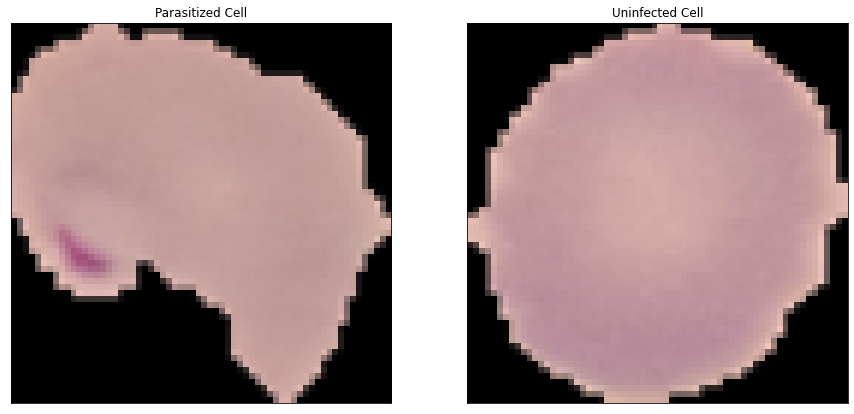

In [13]:
# Close up training images of a parasitized red blood cell and an unifected red blood cell.

plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(train_images[0])
plt.title('Parasitized Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(train_images[24598])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()



**Observations:**

* Observed is a close up of a parasitized red blood cell with the darker discolored patches within.
* The uninfected cell on the right illustrates the white and lighter colored discoloration within the healthy red blood cell.



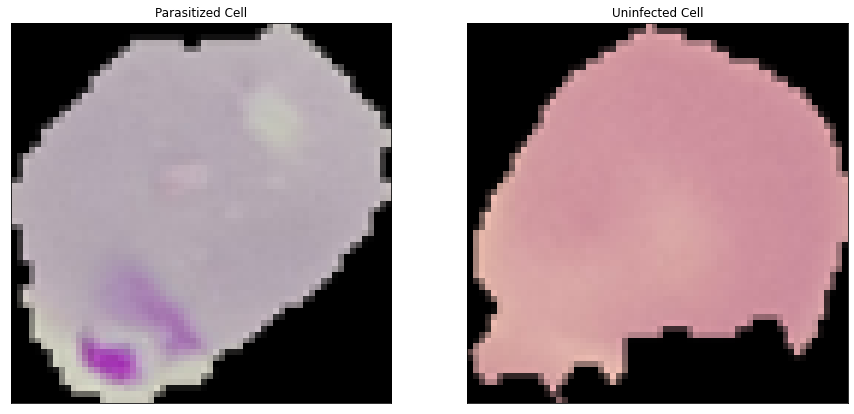

In [14]:
# Close up testing images of a parasitized red blood cell and an unifected red blood cell.

plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(test_images[0])
plt.title('Parasitized Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(test_images[2599])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

**Observations:**

* Observed is a close up of a parasitized red blood cell with the darker discolored patches within.
* The uninfected cell on the right illustrates the evenly colored healthy red blood cell.




**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Is there an Imbalance in the Dataset?**

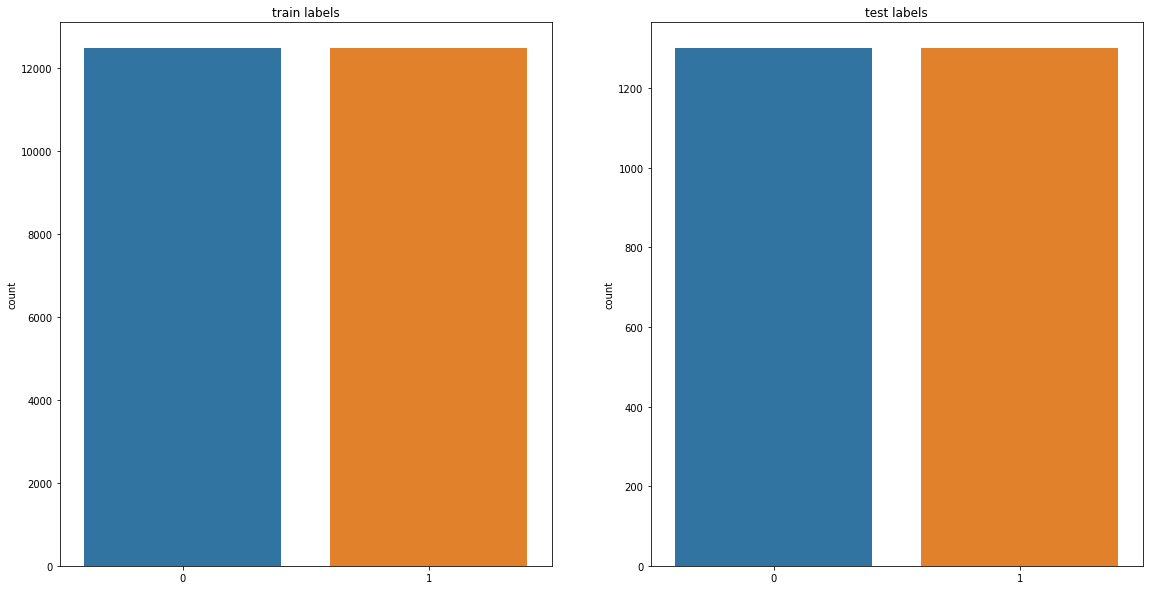

In [15]:
# Check to see if there is an imbalance in the datatset by graph visualization.

plt.figure(1 , figsize = (30 ,10))
n = 0 
for z , j in zip([train_labels , test_labels] , ['train labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

**Observations:**

* The dataset is evenly balanced between parasitized and uninfected red blood cells.



In [16]:
# Red blood cells labels random sample (1 = parasitized & 0 = uninfected).

np.random.choice(train_labels, 50)

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1])

**Observation:**

* The dataset displays a balanced random sample of label values (1 = parasitized & 0 = uninfected).



**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Are there any null values in the Dataset?**

In [17]:
# Check to see if there are any null values in the train_labels numpy array

train_labels_sum = np.sum(train_labels)

train_labels_has_nan = np.isnan(train_labels_sum)


print(train_labels_has_nan) #If there are no null values this will return "False"; otherwise "True" will be the output.

False


**Observation:**

* There are no null values in the training labels dataset.



In [18]:
# Check to see if there are any null values in the train_images numpy array

train_images_sum = np.sum(train_images)

train_images_has_nan = np.isnan(train_images_sum)


print(train_images_has_nan) #If there are no null values this will return "False"; otherwise "True" will be the output.

False


**Observation:**

* There are no null values in the training images dataset.



In [19]:
# Check to see if there are any null values in the test_labels numpy array

test_labels_sum = np.sum(test_labels)

test_labels_has_nan = np.isnan(test_labels_sum)


print(test_labels_has_nan) #If there are no null values this will return "False"; otherwise "True" will be the output.

False


**Observation:**

* There are no null values in the testing labels dataset.



In [20]:
# Check to see if there are any null values in the test_images numpy array

test_images_sum = np.sum(test_images)

test_images_has_nan = np.isnan(test_images_sum)


print(test_images_has_nan) #If there are no null values this will return "False"; otherwise "True" will be the output.

False


**Observation:**

* There are no null values in the testing images dataset.



In [21]:
# Create a dataframe from the training array of images

df_train_labels = pd.DataFrame(train_labels, columns = ['Diagnosis'])

print(df_train_labels)
print(type(df_train_labels))

       Diagnosis
0              1
1              1
2              1
3              1
4              1
...          ...
24953          0
24954          0
24955          0
24956          0
24957          0

[24958 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [22]:
# Create a dataframe from the testing array of images

df_test_labels = pd.DataFrame(test_labels, columns = ['Diagnosis'])

print(df_test_labels)
print(type(df_test_labels))

      Diagnosis
0             1
1             1
2             1
3             1
4             1
...         ...
2595          0
2596          0
2597          0
2598          0
2599          0

[2600 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Number of Red Blood Cell Images For Each Label Type**

In [23]:
# Number of red blood cells images for each each type of label (1 = parasitized & 0 = uninfected).
 
lbl_val_counts= df_train_labels.value_counts().to_frame('Count').reset_index()
lbl_val_counts

,Diagnosis,Count
0,0,12479
1,1,12479


**Observations:**

* Balance dataset as observed earlier.
* Two classifications (1 = parasitized & 0 = uninfected).



**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Is there Similarity Within the Red Blood Cell images of the Same Category?**

In [24]:
# Visualize the sample images (6) per red blood cell diagnosis category to observe the similarity with-in the same category.
# Sample red blood cells diagnosis index for data visualization.

row_data=[]
for c in lbl_val_counts['Diagnosis'].sort_values():
    row_data.append([c,df_train_labels[df_train_labels['Diagnosis']==c].head(6).index.values])
    sample_rbc_index_df=pd.DataFrame(data=row_data,columns=['Diagnosis','Sample Indexes']).sort_values(by='Diagnosis')   
sample_rbc_index_df

,Diagnosis,Sample Indexes
0,0,"[12479, 12480, 12481, 12482, 12483, 12484]"
1,1,"[0, 1, 2, 3, 4, 5]"


**Observations:**

* The sample indexes will be used to print the sample images for further visualization below.



**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Visualize the Gray Scale Red Blood Cell Images.**

In [25]:
# Helper function to print sample images.

def print_sample_images_gray(imageData):
  fig = plt.figure(figsize = (25,25))
  i=0
  for c in lbl_val_counts['Diagnosis'].sort_values():
    indexVals = sample_rbc_index_df[sample_rbc_index_df['Diagnosis'] == c]['Sample Indexes'].values
    
    for imgIndx in indexVals.all():
      fp=imageData[imgIndx]
      label=c
     
      ax = fig.add_subplot(12, 6, i+1)
      i=i+1
      
      plt.imshow(fp,cmap='gray')
      plt.title(label)
      plt.axis('off')
      plt.tight_layout(w_pad=-25,h_pad=1)
  plt.show()

In [26]:
# Helper function to print sample images.

def print_sample_images(imageData):
  fig = plt.figure(figsize = (25,25))
  i=0
  for c in lbl_val_counts['Diagnosis'].sort_values():
    indexVals = sample_rbc_index_df[sample_rbc_index_df['Diagnosis'] == c]['Sample Indexes'].values
    
    for imgIndx in indexVals.all():
      fp=imageData[imgIndx]
      label=c
     
      ax = fig.add_subplot(12, 6, i+1)
      i=i+1
      
      plt.imshow(fp,cmap='gray')
      plt.title(label)
      plt.axis('off')
      plt.tight_layout(w_pad=-25,h_pad=1)
  plt.show()

In [27]:
# Converting color images to gray scale (train).

train_images_gray=np.empty(shape=(train_images.shape[0],64,64))
for i in range(train_images.shape[0]):
  train_images_gray[i]=cv2.cvtColor(train_images[i], cv2.COLOR_BGR2GRAY)

In [28]:
# Converting color images to gray scale (test).

test_images_gray=np.empty(shape=(test_images.shape[0],64,64))
for i in range(test_images.shape[0]):
  test_images_gray[i]=cv2.cvtColor(test_images[i], cv2.COLOR_BGR2GRAY)

In [29]:
train_images_gray.shape

(24958, 64, 64)

In [30]:
test_images_gray.shape

(2600, 64, 64)

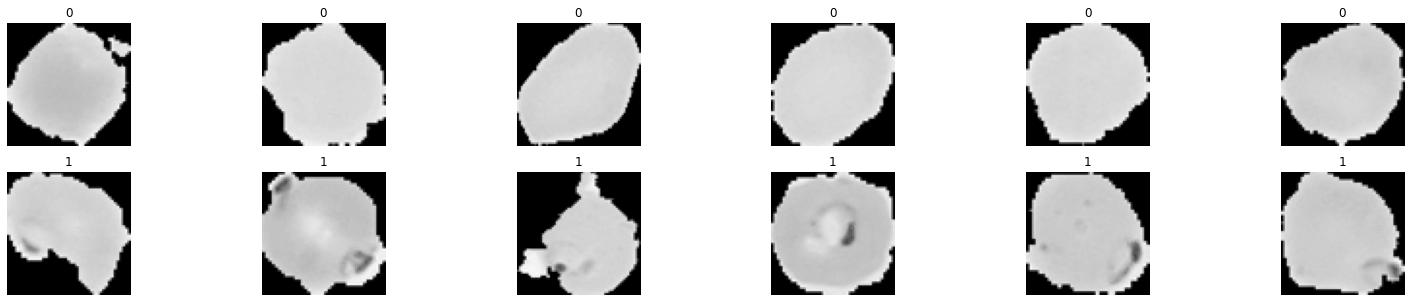

In [31]:
# Print a sample of the gray scale images (train).

print_sample_images_gray(train_images_gray)

**Observations:**

* The red blood cell images are now displayed in grayscale which still displays the visual differences between the parasitized cells (1) and the uninfected cells (0).

* In grayscale the presence of the parasites is indicated by the darker discoloration patches within the red blood cells. 

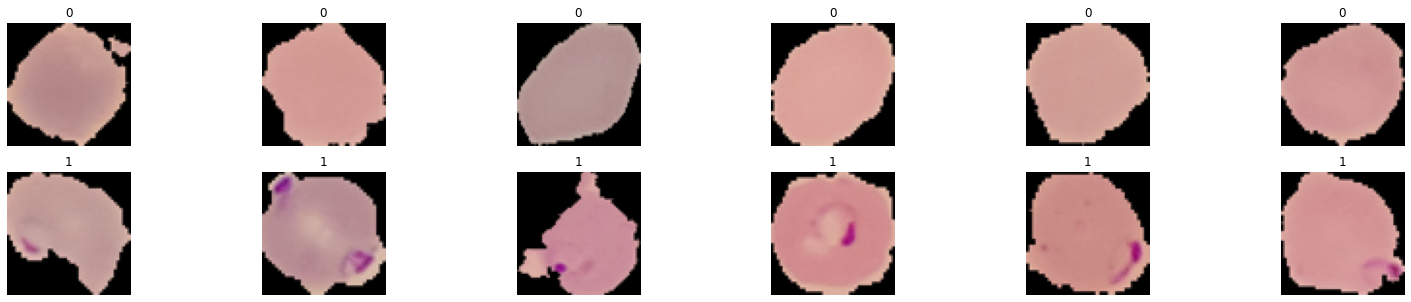

In [32]:
# Print a sample of the colored images to compare with the grayscale images above (train).

print_sample_images(train_images)

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Visualize the Black and White Red Blood Cell Images.**

In [33]:
# Helper function to print sample images.

def print_sample_images_bw(imageData):
  fig = plt.figure(figsize = (25,25))
  i=0
  for c in lbl_val_counts['Diagnosis'].sort_values():
    indexVals = sample_rbc_index_df[sample_rbc_index_df['Diagnosis'] == c]['Sample Indexes'].values
    
    for imgIndx in indexVals.all():
      fp=imageData[imgIndx]
      label=c
    
      ax = fig.add_subplot(12, 6, i+1)
      i=i+1
      
      plt.imshow(fp,cmap='binary')
      plt.title(label)
      plt.axis('off')
      plt.tight_layout(w_pad=-25,h_pad=1)
  plt.show()

In [34]:
# Converting color images to black and white.

train_images_bw=np.empty(shape=(train_images.shape[0],64,64))
for i in range(train_images.shape[0]):
  train_images_bw[i]=cv2.cvtColor(train_images[i], cv2.COLOR_BGR2GRAY)

In [35]:
train_images_bw.shape

(24958, 64, 64)

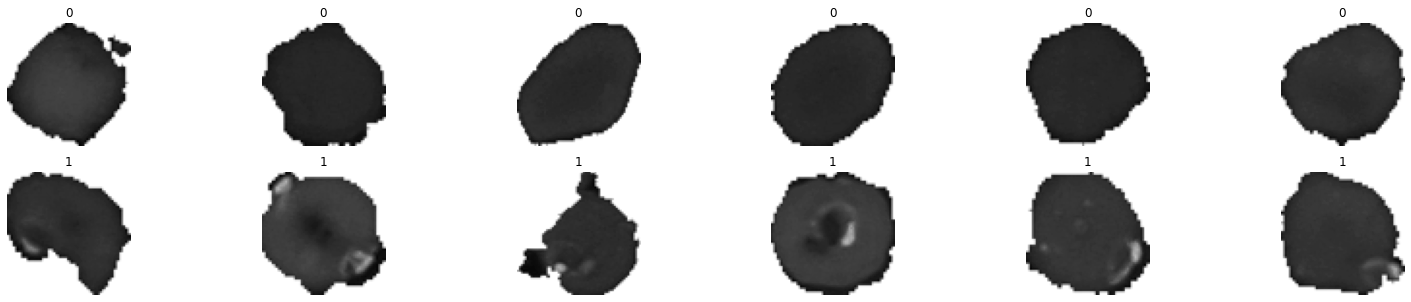

In [36]:
# Print a sample of the gray scale images.

print_sample_images_bw(train_images_bw)

**Observations:**

* The red blood cell images are now displayed in black and white which still displays the visual differences between the parasitized cells (1) and the uninfected cells (0).

* In black and white the presence of the parasites is indicated by the lighter discoloration patches within the red blood cells. 

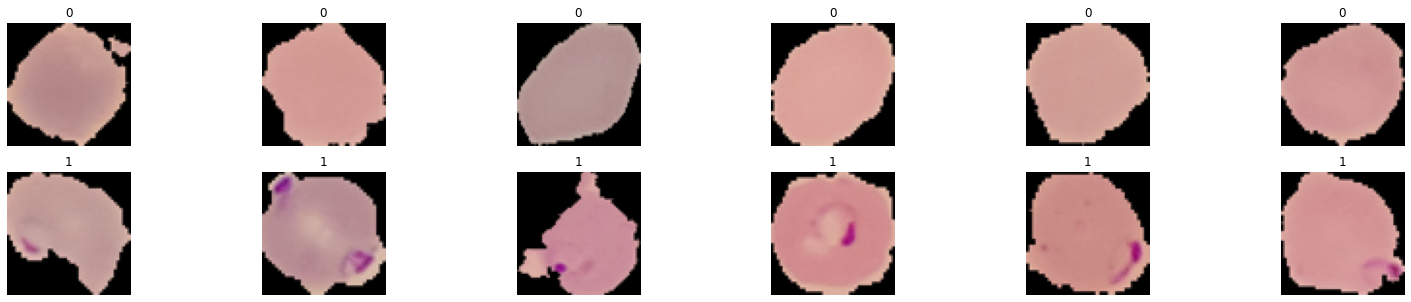

In [37]:
# Print a sample of the colored images to compare with the black and white images above.

print_sample_images(train_images)

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Visualize the  Hue, Saturation and Value (HSV) Red Blood Cell Images.**

In [38]:
# Helper function to print sample images.

def print_sample_images_hsv(imageData):
  fig = plt.figure(figsize = (25,25))
  i=0
  for c in lbl_val_counts['Diagnosis'].sort_values():
    indexVals = sample_rbc_index_df[sample_rbc_index_df['Diagnosis'] == c]['Sample Indexes'].values
    
    for imgIndx in indexVals.all():
      fp=imageData[imgIndx]
      label=c
    
      ax = fig.add_subplot(12, 6, i+1)
      i=i+1
      
      plt.imshow(fp,cmap='hsv')
      plt.title(label)
      plt.axis('off')
      plt.tight_layout(w_pad=-25,h_pad=1)
  plt.show()

In [39]:
# Helper function to print sample images.

def print_sample_images_gray(imageData):
  fig = plt.figure(figsize = (25,25))
  i=0
  for c in lbl_val_counts['Diagnosis'].sort_values():
    indexVals = sample_rbc_index_df[sample_rbc_index_df['Diagnosis'] == c]['Sample Indexes'].values
    
    for imgIndx in indexVals.all():
      fp=imageData[imgIndx]
      label=c
    
      ax = fig.add_subplot(12, 6, i+1)
      i=i+1
      
      plt.imshow(fp,cmap='gray')
      plt.title(label)
      plt.axis('off')
      plt.tight_layout(w_pad=-25,h_pad=1)
  plt.show()

In [40]:
# Converting color images to hsv - train.

train_images_hsv=np.empty(shape=(train_images.shape[0],64,64,3))
for i in range(train_images.shape[0]):
  train_images_hsv[i]=cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

In [41]:
# Converting color images to hsv - test.

test_images_hsv=np.empty(shape=(test_images.shape[0],64,64,3))
for i in range(test_images.shape[0]):
  test_images_hsv[i]=cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

In [42]:
train_images_hsv.shape

(24958, 64, 64, 3)

In [43]:
test_images_hsv.shape

(2600, 64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

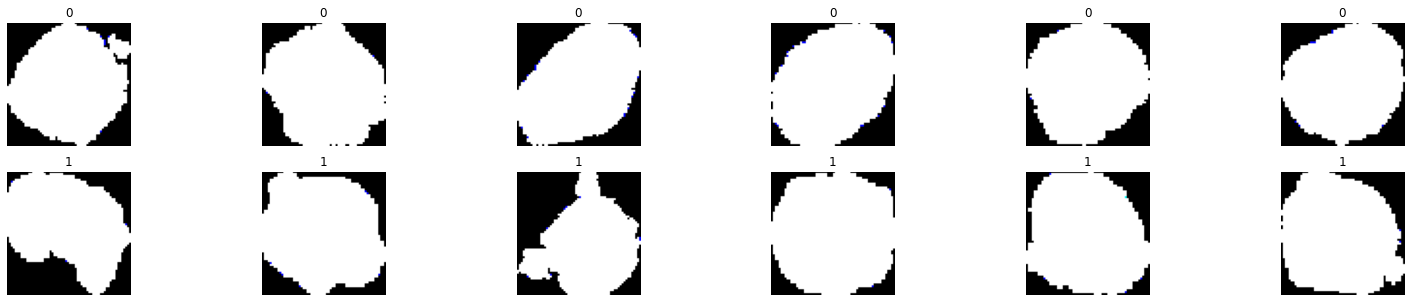

In [44]:
# Print a sample of the hsv images.

print_sample_images_hsv(train_images_hsv)

**Observations:**

* The red blood cell images are now displayed in hue saturation value (HSV) which still displays the visual differences between the parasitized cells (1) and the uninfected cells (0).

* In hsv the presence of the parasites in several of the red blood cell images is indicated by the cyan discoloration patches within the red blood cells. 

* Some of the red blood cell images in hsv are more difficult to distinguish (to the human eye) between parasetized and uninfected cells. For example slide 3 and slide 9 look anomalous.

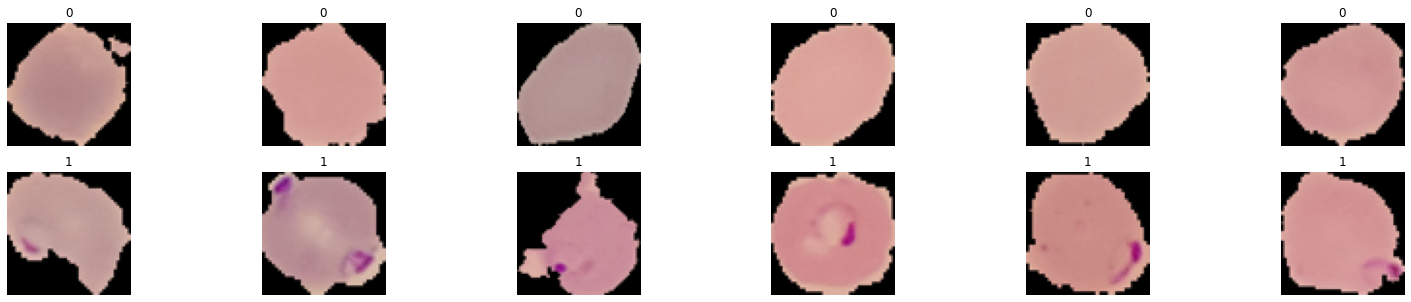

In [45]:
# Print a sample of the colored images to compare with the hsv images above.

print_sample_images(train_images)

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Finding the Mean Images for Each Class of the Red Blood Cell Images.**

In [46]:
img_dict={}
for c in lbl_val_counts['Diagnosis']:
  img_dict[c]=[]
for i in range(df_train_labels.shape[0]):
  label=df_train_labels.iloc[i]['Diagnosis'] 
  img_dict[label].append(train_images[i])

In [47]:
# Helper function to print Avg/mean of an image per category/Label.

def print_images_mean():
  fig = plt.figure(figsize = (45,45))
  i=0
  for c in lbl_val_counts['Diagnosis'].sort_values():
    mean_img = np.mean(img_dict[c],axis =0)
    mean_img = mean_img/np.amax(mean_img)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((64,64,3))
    #print(i)
    ax = fig.add_subplot(12, 3, i+1)
    i=i+1
  
    # to plot without rescaling, remove target_size
    #fn = image.load_img(fp,color_mode='rgb')
    plt.imshow(mean_img)
    plt.title(f'Average {c}')
    plt.axis('off')
    plt.tight_layout(w_pad=-250,h_pad=5)
  plt.show()

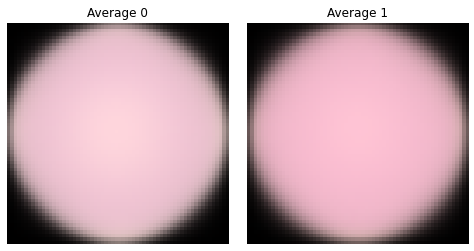

In [48]:
print_images_mean()

**Observations:**

* The mean images for the red blood cells show a slightly darker shade of pink color for the  parasitized cells (1) when compared to the uninfected cells (0).

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## <b><font color=purple>Data Pre-Processing.</font></b>


### **No Gaussian Blurring et al.**

In [49]:
imgData_original_train=np.copy(train_images,subok=True)
imgData_original_test=np.copy(test_images,subok=True)

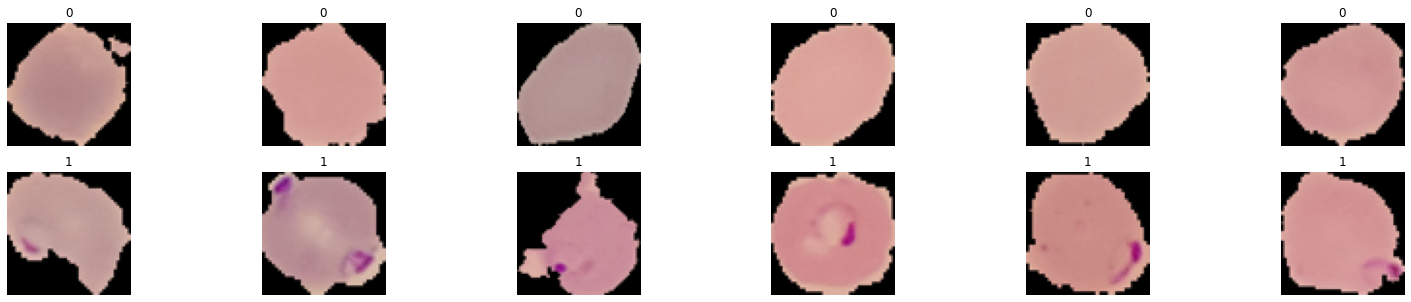

In [50]:
print_sample_images(imgData_original_train)

**Observations:**

* Above images show the original iages in the dataset without any filters.

### **Gaussian Blurring.**

* Image blurring is achieved by convolving the image with a low-pass filter kernel useful for removing noise.

* Using 5x5 Gaussian blurring kernal to reduce image noise and detail as a part of pre-processing.

In [51]:
imgData_blurred=np.copy(train_images,subok=True)
for i in range(train_images.shape[0]):
  cv2.GaussianBlur(train_images[i], (5, 5), 0)

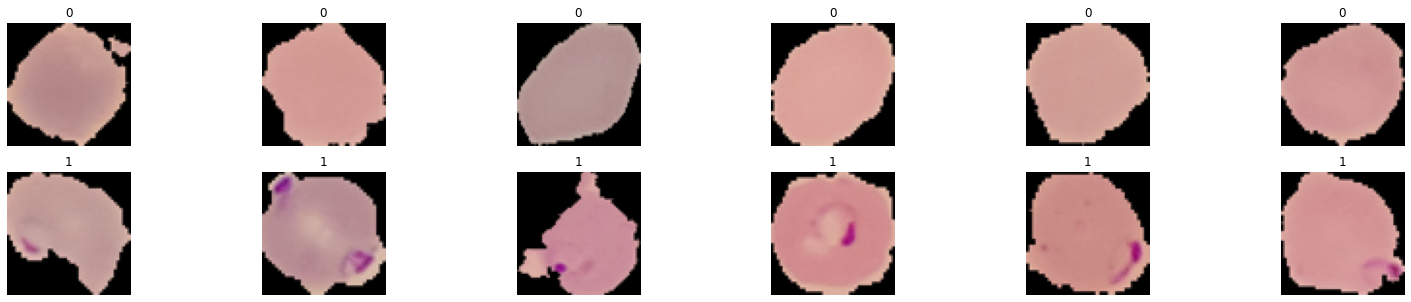

In [52]:
print_sample_images(imgData_blurred)

**Observation:**

* Above images show that after applying Gaussian Blurring kernal on the images there is a little reduction in image detail.
* We will ignore the blurred images for the purposes of building our subsequent models.

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Normalization.</font>**

* Normalize tensors to 0 - 1 scale. The red blood cells image data needs to be normalized to 0-1 by diving the values by 255.

In [53]:
# Normalizing the pixel values.  

# Original dataset (no Gaussian Blurring et al.).

imgData_original_train_normalized=np.copy(imgData_original_train,subok=True)
imgData_original_train_normalized=imgData_original_train/255.0

imgData_original_test_normalized=np.copy(imgData_original_test,subok=True)
imgData_original_test_normalized=imgData_original_test/255.0


# Grayscale dataset

imgData_grayscale_train_normalized=np.copy(train_images_gray,subok=True)
imgData_grayscale_train_normalized=train_images_gray/255.0

imgData_grayscale_test_normalized=np.copy(test_images_gray,subok=True)
imgData_grayscale_test_normalized=test_images_gray/255.0


#  HSV dataset

imgData_hsv_train_normalized=np.copy(train_images_hsv,subok=True)
imgData_hsv_train_normalized=train_images_hsv/255.0

imgData_hsv_test_normalized=np.copy(test_images_hsv,subok=True)
imgData_hsv_test_normalized=test_images_hsv/255.0






* Reshape the original dataset with no Gaussian Blurring.

In [54]:
# Image reshaping original dataset with no Gaussian Blurring et al..

imgData_original_train_normalized=imgData_original_train_normalized.reshape(-1,64,64,3)

imgData_original_test_normalized=imgData_original_test_normalized.reshape(-1,64,64,3)


# Sample image data after normalization (original dataset with no Gaussian Blurring et al.).

imgData_original_train_normalized[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [55]:
# Imagedata shape normalized.

imgData_original_train_normalized.shape

imgData_original_test_normalized.shape

(2600, 64, 64, 3)

In [56]:
# Imagedata grayscale shape normalized.

imgData_grayscale_train_normalized.shape

imgData_grayscale_test_normalized.shape

(2600, 64, 64)

In [57]:
# Imagedata hsv shape after normalization.

imgData_hsv_train_normalized.shape

imgData_hsv_test_normalized.shape

(2600, 64, 64, 3)

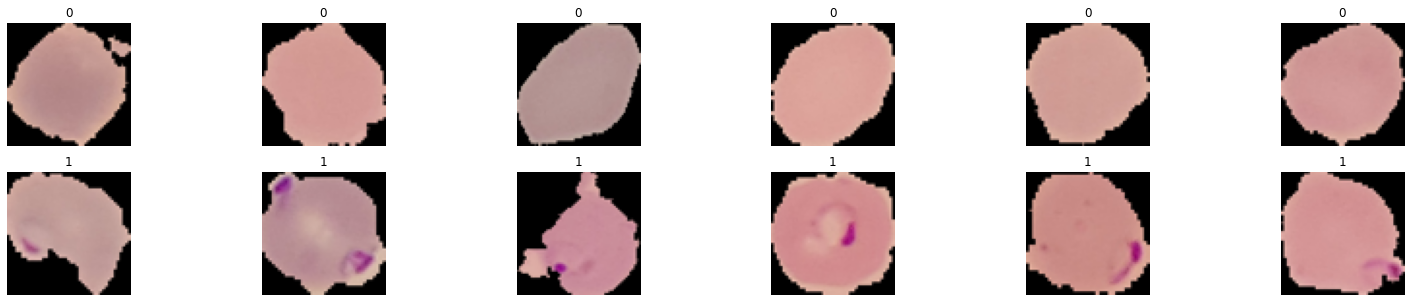

In [58]:
# Printing sample images normalized pre processes.

print_sample_images(imgData_original_train_normalized)

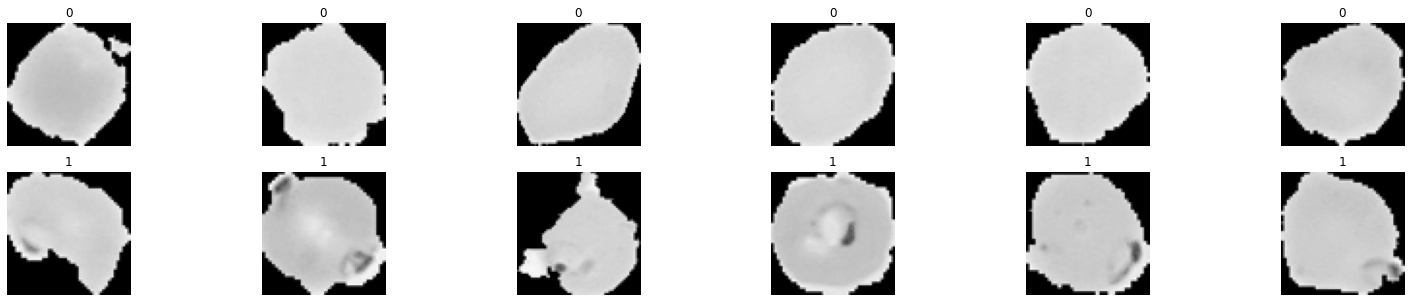

In [59]:
# Printing sample images normalized pre processes.

print_sample_images_gray(imgData_grayscale_train_normalized)

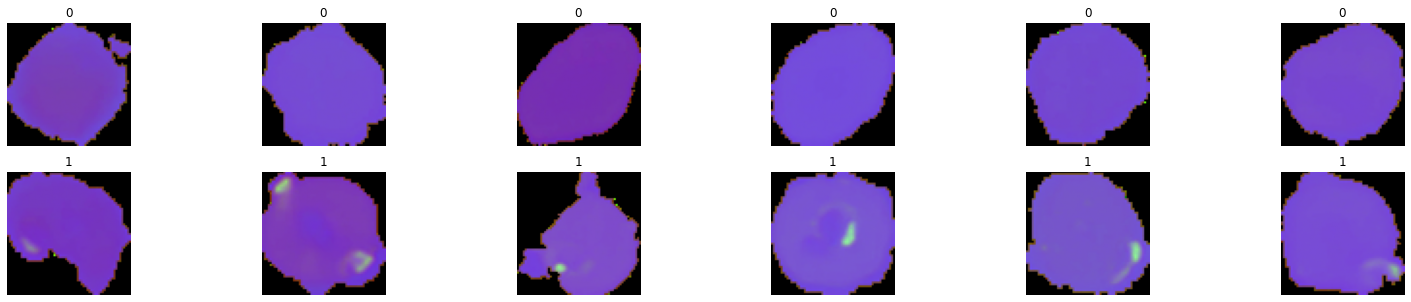

In [60]:
# Printing sample hsv images after normalization pre processes.

print_sample_images(imgData_hsv_train_normalized)

**Observations:**

* Both normalized datasets look good for our subsequent model building purposes.

* The edges of the red blood cells are clearly visible with the saturated hsv images of the red blood cells.

* No further "edge detection" techniques are required with thsi dataset because the backgrounds are one solid color and are not "noisy" with other images in addition to the red blood cells.

* The HSV version of the dataset will be used because this is common practice in image analysis in the medical field and the preferred standard.

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## <b><font color=purple>Data Preparation.</font></b>

In [61]:
# Create a normalized hsv dataset so that the subsequent neural network model(s) can accept it.

ANN_imgData_hsv_train_normalized = imgData_hsv_train_normalized
ANN_imgData_hsv_test_normalized = imgData_hsv_test_normalized

In [62]:
# Reshape the normalized hsv dataset so that the subsequent model(s) can accept it.

# imgData_hsv_train_normalized = imgData_hsv_train_normalized.reshape((24958,64*64))

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Split the Original Data (Train and Test).**

* Dataset already has a training dataset and a testing dataset.
* We will split test data into test and validation with test_size = 0.5.

In [63]:
X_train = train_images
y_train = train_labels

print(X_train.shape)
print(y_train.shape)

(24958, 64, 64, 3)
(24958,)


In [64]:
X_test = test_images
y_test = test_labels

print(X_test.shape)
print(y_test.shape)

(2600, 64, 64, 3)
(2600,)


**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Split the Grayscale Data (Train, Test, and Validation).**

* Dataset already has a training dataset and a testing dataset.
* We will split test data into test and validation with test_size = 0.5.

In [65]:
X_train_gs = imgData_grayscale_train_normalized.reshape((24958,64*64))
y_train_gs = train_labels

print(X_train_gs.shape)
print(y_train_gs.shape)


(24958, 4096)
(24958,)


In [66]:
X_test_gs = imgData_grayscale_test_normalized.reshape((2600,64*64))
y_train__gs = train_labels
y_test_gs = test_labels

print(X_test_gs.shape)
print(y_test_gs.shape)


(2600, 4096)
(2600,)


In [67]:
X_test_gs, X_val_gs, y_test_gs, y_val_gs = train_test_split(X_test_gs, test_labels, test_size = 0.5, random_state=2)
print(X_test_gs.shape)
print(X_val_gs.shape)
print(y_test_gs.shape)
print(y_val_gs.shape)


(1300, 4096)
(1300, 4096)
(1300,)
(1300,)


**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Check Data Compatibility with Keras and Encoding Necessity.**

* Image data and Label data are compatible with Keras.

* Encoding is not required in the target variable with this dataset because the labels are already in numeric form with "1" and "0" representing "parasetized" and "uninfected" respectively. 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## <b><font color=purple>Model(s) Strategy.</font></b>

#### **The strategy is to build the following models in order to effectively identify correctly the parasetized and the uninfected red blood cells:**

* Logistic Regression (using the SKLearn library)
* Decision Tree Classifier
* Random Forest Classifier
* XGBoost
* Tuned XGBoost
* Artificial Neural Network (Convoluted Neural Network)

1) Accuracy, Recall, and Precision will be measured using these models with particular focus on Recall identifying False Negatives. 

2) The effectiveness of these models is also dependent on the assumption of having all the images correctly labelled; no errors in labeling present.

3) The size of the red blood cell images dataset may prove to be problematic in terms of the model(s) running times; a scaled down version of the dataset may be necessary in view of the processing power limitations of Google Colab.

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Building the Model(s).</font>**

### **Model evaluation criterion:**

#### Model can make wrong predictions as:

1. Predicting a red blood cell is parasetized when in reality it is not - Unnecessary malaria treatment/medication given to the patient but it most likely will not harm the patient and may even be preventative against possible future malaria bouts. 

2. Predicting a red blood cell is uninfected when in reality it is parasetized - Possible death of patient and/or severe malaria illness.

#### Which case is more important? 

* Predicting a red blood cell is uninfected when in reality it is parasetized.

#### How to reduce this loss i.e need to reduce False Negatives?

* Recall to be maximized, greater the Recall lesser the chances of false negatives.

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

**Create two functions to calculate different metrics and confusion matrix, so that we do not have to use the same code repeatedly for each model.**

In [68]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision

def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results

    score_list=[] 
    
    pred_train = model.predict(X_train_hsv)
    pred_val = model.predict(X_val_hsv)
    pred_test = model.predict(X_test_hsv)
    
    train_acc = model.score(X_train_hsv,y_train_hsv)
    val_acc = model.score(X_val_hsv,y_val_hsv)
    test_acc = model.score(X_test_hsv,y_test_hsv)
    
    train_recall = recall_score(y_train_hsv,pred_train)
    val_recall = recall_score(y_val_hsv,pred_val)
    test_recall = recall_score(y_test_hsv,pred_test)
    
    train_precision = precision_score(y_train_hsv,pred_train)
    val_precision = precision_score(y_val_hsv,pred_val)
    test_precision = precision_score(y_test_hsv,pred_test)
    
    score_list.extend((train_acc,val_acc,test_acc,train_recall,val_recall,test_recall,train_precision,val_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train_hsv,y_train_hsv))
        print("Accuracy on validation set : ",model.score(X_val_hsv,y_val_hsv))
        print("Accuracy on test set : ",model.score(X_test_hsv,y_test_hsv))
        print("Recall on training set : ",recall_score(y_train_hsv,pred_train))
        print("Recall on validation set : ",recall_score(y_val_hsv,pred_val))
        print("Recall on test set : ",recall_score(y_test_hsv,pred_test))
        print("Precision on training set : ",precision_score(y_train_hsv,pred_train))
        print("Precision on validation set : ",precision_score(y_val_hsv,pred_val))
        print("Precision on test set : ",precision_score(y_test_hsv,pred_test))
    
    return score_list # returning the list with train and test scores

In [69]:
## Function to create confusion matrix for the ensemble techniques

def make_confusion_matrix_ensemble(model,y_actual,labels=[1, 0]):
#    '''
#    model : classifier to predict values of X
#    y_actual : ground truth  
#    
#    '''
    y_predict = model.predict(X_test_hsv)
    cm=confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [70]:
# Plotting Confusion matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
   
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Logistic Regression**

In [71]:
LR_X_train_gs = X_train_gs 

In [72]:
# Reshape the dataset so that the logistic regression model can accept it.

LR_X_test_gs = X_test_gs  

In [73]:
# Reshape the dataset so that the logistic regression model can accept it.

LR_X_val_gs = X_val_gs    

In [74]:
# Create the logistic regression model.
  
LR_model = LogisticRegression()

In [75]:
# Fit the model

LR_model.fit(LR_X_train_gs,y_train_gs)

LogisticRegression()

In [76]:
# Predict the classes in validation.

y_pred = LR_model.predict(LR_X_val_gs)

In [77]:
LR_val_accuracy = accuracy_score(y_val_gs, y_pred)

print("Accuracy in HSV validation: ", LR_val_accuracy)

Accuracy in HSV validation:  0.6415384615384615


In [78]:
LR_val_recall = recall_score(y_val_gs, y_pred)

print("Recall in HSV validation: ", LR_val_recall)

Recall in HSV validation:  0.6316590563165906


In [79]:
LR_val_precision = precision_score(y_val_gs, y_pred)

print("Precision in HSV validation: ", LR_val_precision)

Precision in HSV validation:  0.6494522691705791


In [80]:
# Predict the classes in test.

y_pred = LR_model.predict(LR_X_test_gs)

In [81]:
LR_test_accuracy = accuracy_score(y_test_gs, y_pred)

print("Accuracy in HSV test: ", LR_test_accuracy)

Accuracy in HSV test:  0.6515384615384615


In [82]:
LR_test_recall = recall_score(y_test_gs, y_pred)

print("Recall in HSV test: ", LR_test_recall)

Recall in HSV test:  0.6438569206842923


In [83]:
LR_test_precision = precision_score(y_test_gs, y_pred)

print("Precision in HSV test: ", LR_test_precision)

Precision in HSV test:  0.6489028213166145


**Observations:**

* Logistic Regression does not perform well on the HSV version of the red blood cells dataset with accuracy scores hovering around 65%.

* Other scores such as Recall and Precision also hover around the same 64% to 65%.

**<font color=blue>==============================================================================================================================================================================================================================</font>**


#### **Reshaping the hsv datasets (validation and test) into two dimensional arrays so that the subsequent models will accept the red blood cell images as inputs.**

In [84]:
# Reshape the dataset so that the subsequent models can accept it.

# X_test_hsv = X_test_hsv.reshape((1300,64*64))

In [85]:
# Reshape the dataset so that the subsequent models can accept it.

# X_val_hsv = X_val_hsv.reshape((1300,64*64))

#### **The dataset is quite large so let us take subsets of it in order to reduce the computational resource challenges.**

In [86]:
# Subset 15000 records for training, 2600 records for testing, and 2600 records for validation respectively.

# X_train_hsv = X_train_hsv[:15000]
# y_train_hsv = y_train_hsv[:15000]
# X_test_hsv = X_test_hsv[:2600]
# y_test_hsv = y_test_hsv[:2600]
# X_val_hsv = X_val_hsv[:2600]
# y_val_hsv = y_val_hsv[:2600]

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Decision Tree Classifier**

In [ ]:
# Fitting the model

DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train_hsv,y_train_hsv)

# Calculating different metrics

get_metrics_score(DT_model)

# Creating confusion matrix

make_confusion_matrix_ensemble(DT_model,y_test_hsv)

**Observations:**

* 

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

#### **Decision Tree Classifier: Cost Complexity Pruning**

**Pruning the tree might improve performance.**

In [ ]:
path = DT_model.cost_complexity_pruning_path(X_train_hsv, y_train_hsv)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train_hsv, y_train_hsv)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
# Fitting model for each value of alpha and saving the train recall in a list 

recall_train=[]
for clf in clfs_list:
    pred_train=clf.predict(X_train_hsv)
    values_train=recall_score(y_train_hsv,pred_train)
    recall_train.append(values_train)

In [ ]:
# Fitting model for each value of alpha and saving the validation recall in a list

recall_val=[]
for clf in clfs_list:
    pred_val=clf.predict(X_val_hsv)
    values_val=recall_score(y_val_hsv,pred_val)
    recall_val.append(values_val)

In [ ]:
# Fitting model for each value of alpha and saving the test recall in a list

recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test_hsv)
    values_test=recall_score(y_test_hsv,pred_test)
    recall_test.append(values_test)

In [ ]:
# Plotting the graph for recall vs. alpha 

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training, validation, and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_val, marker='o', label="validation",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Creating the model where we get highest test recall

index_best_pruned_model = np.argmax(recall_test)

DT_model_pruned = clfs_list[index_best_pruned_model]

get_metrics_score(DT_model_pruned)

make_confusion_matrix_ensemble(DT_model_pruned,y_test_hsv)

**Observations:**

*

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

#### **Decision Tree Classifier: Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 

DT_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations

scorer = make_scorer(recall_score)

# Run the grid search

grid_obj = RandomizedSearchCV(DT_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_hsv, y_train_hsv)

# Set the clf to the best combination of parameters

DT_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 

DT_estimator.fit(X_train_hsv, y_train_hsv)

In [ ]:
get_metrics_score(DT_estimator)

make_confusion_matrix_ensemble(DT_estimator,y_test_hsv)

**Observations:**

* 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Random Forest Classifier**

In [ ]:
#Fitting the model

RF_estimator = RandomForestClassifier(random_state=1)
RF_estimator.fit(X_train_hsv,y_train_hsv)

#Calculating different metrics

get_metrics_score(RF_estimator)

#Creating confusion matrix

make_confusion_matrix_ensemble(RF_estimator,y_test_hsv)

**Observations:**

* 

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

### **Random Forest Classifier: Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 

RF_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = RandomizedSearchCV(RF_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_hsv, y_train_hsv)

# Set the clf to the best combination of parameters
RF_tuned = grid_obj.best_estimator_

# RF_tuned the best algorithm to the data. 
RF_tuned.fit(X_train_hsv, y_train_hsv)

In [ ]:
#Calculating different metrics
get_metrics_score(RF_tuned)

#Creating confusion matrix
make_confusion_matrix_ensemble(RF_tuned,y_test_hsv)

**Observations:**

* 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Bagging Classifier**

In [ ]:
#Fitting the model
BG_classifier = BaggingClassifier(random_state=1)
BG_classifier.fit(X_train_hsv,y_train_hsv)

#Calculating different metrics
get_metrics_score(BG_classifier)

#Creating confusion matrix
make_confusion_matrix_ensemble(BG_classifier,y_test_hsv)

**Observations:**

* 

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

### **Bagging Classifier: Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
BG_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(BG_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_hsv, y_train_hsv)

# Set the clf to the best combination of parameters
BG_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
BG_estimator_tuned.fit(X_train_hsv, y_train_hsv)

In [ ]:
# Calculating different metrics

get_metrics_score(BG_estimator_tuned)

# Creating confusion matrix

make_confusion_matrix_ensemble(BG_estimator_tuned,y_test_hsv)

**Observations:**

* 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **AdaBoost Classifier**

In [ ]:
# Fitting the model

AB_classifier = AdaBoostClassifier(random_state=1)
AB_classifier.fit(X_train_hsv,y_train_hsv)

# Calculating different metrics

get_metrics_score(AB_classifier)

# Creating confusion matrix

make_confusion_matrix_ensemble(AB_classifier,y_test_hsv)

**Observations:**

* 

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

### **AdaBoost Classifier: Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 

AB_classifier_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    
    # Let's try different max_depth for base_estimator

    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations

acc_scorer = make_scorer(recall_score)

# Run the grid search

grid_obj = RandomizedSearchCV(AB_classifier_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_hsv, y_train_hsv)

# Set the clf to the best combination of parameters

AB_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data

AB_classifier_tuned.fit(X_train_hsv, y_train_hsv)

In [ ]:
# Calculating different metrics

get_metrics_score(AB_classifier_tuned)

# Creating confusion matrix

make_confusion_matrix_ensemble(AB_classifier_tuned,y_test_hsv)

**Observations:**

* 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Gradient Boosting Classifier**

In [ ]:
# Fitting the model

GB_classifier = GradientBoostingClassifier(random_state=1)
GB_classifier.fit(X_train_hsv,y_train_hsv)

# Calculating different metrics

get_metrics_score(GB_classifier)

# Creating confusion matrix

make_confusion_matrix_ensemble(GB_classifier,y_test_hsv)

**Observations:**

* 

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

### **Gradient Boosting Classifier: Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 

GB_classifier_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations

acc_scorer = make_scorer(recall_score)

# Run the grid search

grid_obj = RandomizedSearchCV(GB_classifier_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_hsv, y_train_hsv)

# Set the clf to the best combination of parameters

GB_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.

GB_classifier_tuned.fit(X_train_hsv, y_train_hsv)

In [ ]:
# Calculating different metrics

get_metrics_score(GB_classifier_tuned)

# Creating confusion matrix

make_confusion_matrix_ensemble(GB_classifier_tuned,y_test_hsv)

**Observations:**

* 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **XGBoost Classifier**

In [ ]:
# Fitting the model

XGB_classifier = XGBClassifier(random_state=1)
XGB_classifier.fit(X_train_hsv,y_train_hsv)

#Calculating different metrics

get_metrics_score(XGB_classifier)

#Creating confusion matrix

make_confusion_matrix_ensemble(XGB_classifier,y_test_hsv)

**Observations:**

* 

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

### **XGBoost Classifier: Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 

XGB_classifier_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations

acc_scorer = make_scorer(recall_score)

# Run the grid search

grid_obj = RandomizedSearchCV(XGB_classifier_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_hsv, y_train_hsv)

# Set the clf to the best combination of parameters

XGB_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data

XGB_classifier_tuned.fit(X_train_hsv, y_train_hsv)

In [ ]:
# Calculating different metrics

get_metrics_score(XGB_classifier_tuned)

# Creating confusion matrix

make_confusion_matrix_ensemble(XGB_classifier_tuned,y_test_hsv)

**Observations:**

* 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Stacking Classifier**

- Stacking classifier stacks the output of individual estimators and use a classifier to compute the final prediction.
- Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator. 

In [ ]:
estimators = [('Random Forest',RF_tuned), ('Gradient Boosting',GB_classifier_tuned), ('Decision Tree',DT_estimator)]

final_estimator = XGB_classifier_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train_hsv,y_train_hsv)

In [ ]:
# Calculating different metrics

get_metrics_score(stacking_classifier)

# Creating confusion matrix

make_confusion_matrix_ensemble(stacking_classifier,y_test_hsv)

**Observations:**

* 

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Comparing the Ensemble Models.</font>**

In [ ]:
# defining list of models

models = [DT_model, DT_model_pruned, DT_estimator,RF_estimator, RF_tuned, BG_classifier,BG_estimator_tuned,
          AB_classifier, AB_classifier_tuned, GB_classifier, GB_classifier_tuned, XGB_classifier,XGB_classifier_tuned, stacking_classifier]

# defining empty lists to add train and test results

acc_train = []
acc_val = []
acc_test = []
recall_train = []
recall_val = []
recall_test = []
precision_train = []
precision_val= []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision

for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_val.append(j[1])
    acc_test.append(j[2])
    recall_train.append(j[3])
    recall_val.append(j[4])
    recall_test.append(j[5])
    precision_train.append(j[6])
    precision_val.append(j[7])
    precision_test.append(j[8])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Decision Tree Pruned','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Validation_Accuracy': acc_val, 'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Validation_Recall':recall_val,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Validation_Precision':precision_val,'Test_Precision':precision_test}) 

# Sorting models in decreasing order of test recall

comparison_frame.sort_values(by='Test_Recall',ascending=False)

In [ ]:
feature_names = X_train_hsv.columns
importances = XGB_classifier_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

* 


**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Artificial Neural Network.</font>**

#### **Artificial Neural Network With HSV Dataset.**

In [174]:
ANN_X_train_hsv = ANN_imgData_hsv_train_normalized
ANN_y_train_hsv = train_labels

ANN_X_test_hsv = ANN_imgData_hsv_test_normalized
ANN_y_test_hsv = test_labels


print(ANN_X_train_hsv.shape)
print(ANN_y_train_hsv.shape)

print(ANN_X_test_hsv.shape)
print(ANN_y_test_hsv.shape)

(24958, 64, 64, 3)
(24958,)
(2600, 64, 64, 3)
(2600,)


In [176]:
# Initializing the ANN for the HSV dataset.

model_ann_hsv = Sequential()
model_ann_hsv.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model_ann_hsv.add(MaxPool2D(2,2))
model_ann_hsv.add(Conv2D(64, (3,3), activation='relu'))
model_ann_hsv.add(MaxPool2D(2,2))
model_ann_hsv.add(Conv2D(128, (3,3), activation='relu'))
model_ann_hsv.add(MaxPool2D(2,2))
model_ann_hsv.add(Flatten())
model_ann_hsv.add(Dense(256, activation='relu'))
model_ann_hsv.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(0.0001)

# Defining the optimizer and loss function 

model_ann_hsv.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

In [177]:
# Fitting the model with epochs = 50

model_ann_hsv.fit(ANN_X_train_hsv,ANN_y_train_hsv, epochs=50,validation_data=(ANN_X_test_hsv,ANN_y_test_hsv), batch_size=32,verbose=1) 

Epoch 1/50
780/780 [==============================] - 5s 6ms/step - loss: 0.4023 - accuracy: 0.8104 - val_loss: 0.2036 - val_accuracy: 0.9288
Epoch 2/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1624 - accuracy: 0.9485 - val_loss: 0.1557 - val_accuracy: 0.9500
Epoch 3/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1415 - accuracy: 0.9553 - val_loss: 0.1559 - val_accuracy: 0.9492
Epoch 4/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1307 - accuracy: 0.9582 - val_loss: 0.1447 - val_accuracy: 0.9535
Epoch 5/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1247 - accuracy: 0.9598 - val_loss: 0.1484 - val_accuracy: 0.9492
Epoch 6/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1186 - accuracy: 0.9607 - val_loss: 0.1364 - val_accuracy: 0.9546
Epoch 7/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1124 - accuracy: 0.9627 - val_loss: 0.1350 - val_accuracy: 0.9558
Epoch 

In [178]:
# Evaluate the model

loss, acc = model_ann_hsv.evaluate(ANN_X_test_hsv, ANN_y_test_hsv, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.954
Loss: 0.363


In [179]:
y_predict_nn = model_ann_hsv.predict(ANN_X_test_hsv) # Predicting on test

In [180]:
y_pred_test = model_ann_hsv.predict(ANN_X_test_hsv)
y_pred=[1 if i[0] >0.5 else 0 for i in y_pred_test.tolist()]

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1300
           1       0.96      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



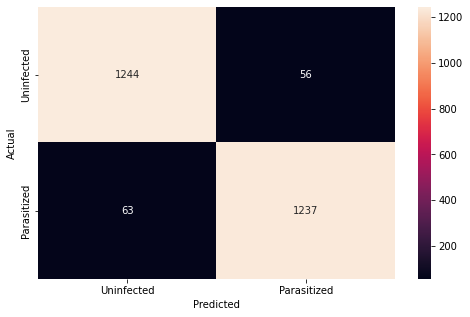

In [181]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(ANN_y_test_hsv,y_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(ANN_y_test_hsv,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Threshold=0.853962, G-Mean=0.956


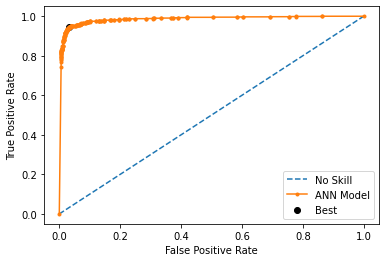

In [182]:
# Plotting ROC Curve
# predict probabilities
yhat = model_ann_hsv.predict(ANN_X_test_hsv)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN Model')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Observations:**

* Using the HSV dataset, the ANN model has performed well with accuracy hovering around the 96th percentile in validation and test.
* Ran 50 epochs.
* Recall, precision and F1-score are all in the 96th percentiles too.
* Loss rate of 36% in test. Not too high.
* 119 records in total are Type 1 and Type 2 errors; approximately 4.6%.


**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

#### **Artificial Neural Network With Original Dataset.**

In [183]:
ANN_X_train = train_images
ANN_y_train = train_labels

ANN_X_test = test_images
ANN_y_test = test_labels


print(ANN_X_train.shape)
print(ANN_y_train.shape)

print(ANN_X_test.shape)
print(ANN_y_test.shape)


(24958, 64, 64, 3)
(24958,)
(2600, 64, 64, 3)
(2600,)


In [184]:
# Initializing the ANN for the original dataset.

model_ann = Sequential()
model_ann.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model_ann.add(MaxPool2D(2,2))
model_ann.add(Conv2D(64, (3,3), activation='relu'))
model_ann.add(MaxPool2D(2,2))
model_ann.add(Conv2D(128, (3,3), activation='relu'))
model_ann.add(MaxPool2D(2,2))
model_ann.add(Flatten())
model_ann.add(Dense(256, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(0.0001)

# Defining the optimizer and loss function 

model_ann.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

In [185]:
# Fitting the model with epochs = 50

model_ann.fit(ANN_X_train,ANN_y_train, epochs=50,validation_data=(ANN_X_test,ANN_y_test), batch_size=32,verbose=1) 

Epoch 1/50
780/780 [==============================] - 5s 5ms/step - loss: 0.5749 - accuracy: 0.7762 - val_loss: 0.2728 - val_accuracy: 0.8896
Epoch 2/50
780/780 [==============================] - 4s 5ms/step - loss: 0.2034 - accuracy: 0.9250 - val_loss: 0.2017 - val_accuracy: 0.9258
Epoch 3/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1504 - accuracy: 0.9486 - val_loss: 0.1620 - val_accuracy: 0.9462
Epoch 4/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1256 - accuracy: 0.9565 - val_loss: 0.1634 - val_accuracy: 0.9431
Epoch 5/50
780/780 [==============================] - 4s 5ms/step - loss: 0.1108 - accuracy: 0.9621 - val_loss: 0.1865 - val_accuracy: 0.9381
Epoch 6/50
780/780 [==============================] - 4s 5ms/step - loss: 0.0920 - accuracy: 0.9672 - val_loss: 0.1547 - val_accuracy: 0.9423
Epoch 7/50
780/780 [==============================] - 4s 5ms/step - loss: 0.0797 - accuracy: 0.9726 - val_loss: 0.1727 - val_accuracy: 0.9454
Epoch 

In [186]:
# Evaluate the model

loss, acc = model_ann.evaluate(ANN_X_test, ANN_y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.951
Loss: 0.698


In [187]:
y_predict_nn = model_ann.predict(ANN_X_test) # Predicting on test

In [188]:
y_pred_test = model_ann.predict(ANN_X_test)
y_pred=[1 if i[0] >0.5 else 0 for i in y_pred_test.tolist()]

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1300
           1       0.96      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



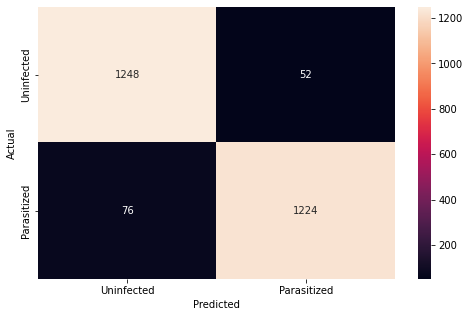

In [189]:
#importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report

print(classification_report(ANN_y_test,y_pred))

#Plotting the heatmap using confusion matrix

cm = confusion_matrix(ANN_y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Threshold=0.347368, G-Mean=0.952


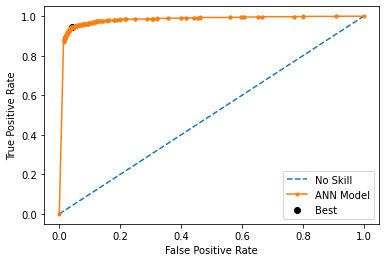

In [190]:
# Plotting ROC Curve
# predict probabilities
yhat = model_ann.predict(ANN_X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN Model')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Observations:**

* Using the original dataset, the ANN model has performed well with accuracy hovering around the 95th percentile in validation and test.
* Ran 50 epochs.
* Recall, precision and F1-score are all in the 95th percentiles too.
* 135 records in total are Type 1 and Type 2 errors; approximately 5%.
* High loss rate of 70% in test.
* The HSV recordset performed slightly better than the original dataset.

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Convoluted Neural Network Models.</font>**

* Create/train four models.
    * 3 models with the HSV and Normalized Image dataset.
    * 1 model with the original dataset.

* For all 4 models:
    * EarlyStopping and Model checkpoint call backs will be used.
    * Metrics will be plotted (Loss, Accuracy, Precision and Recall).
    * Display confusion matrix for Test and Validation data.
    * Misclassification metrics are tabulated including predicted and actual labels with sample images.
    * Perfomance metrics (Train/Test/Validation) for each model will be displayed in a single dataframe for comparision.

* Models Details
    * Model1: Basic Model 
      * 3 Conv/Maxpool layers with 16,32,64 filters and 5x5, 3x3, and 3x3 kernel sizes.
      * 2 dense layers with 512 and 3 (output layer) neurons.

    * Model2: Model with more layers and Dropout
      * 5 Conv/MaxPool/Dropout layers with different filter and kernel sizes.
      * Maxpool layer has strides and dropout layers are added compre to model1.
          * 2 dense layers with 1024 and 3 (output layer) neurons.

    * Model3: Model with Dropout, DataAugumentaion, LRReduction Callbacks to address the overfitting.
      * 5 Conv/MaxPool/Dropout layers with different filter and kernel sizes just like model2.
      * Maxpool layer has strides and dropout layers are added to model1 similar to Model2.
          * 2 dense layers with 1024 and 3 (output layer) neurons similar to Model2.
          * Filter, Kernal sizes are fine tuned and compared with model2.
    * Model4: Basic Model (Original Dataset - No Gaussian Blurring et al.).
        * 3 Conv/Maxpool layers with 16,32,64 filters and 5x5, 3x3, and 3x3 kernel sizes.
        * 2 dense layers with 512 and 3 (output layer) neurons.



**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Helper Functions**

In [191]:
# Prints the confusion matrix.

def print_confusion_matrix_CNN(model,X_values,y_values,title_val):
  # Predict the values from the validation dataset.
  Y_pred = model.predict(X_values)
  # Convert predictions classes to one hot vectors.
  Y_pred_classes = np.argmax(Y_pred,axis = 1) 
  # Convert validation observations to one hot vectors.
  Y_true = np.argmax(y_values,axis = 1) 
  # Compute the confusion matrix.
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
  # Plot the confusion matrix.
  plot_confusion_matrix(confusion_mtx, title=title_val, classes = range(3))
                        

In [192]:
# Plotting Confusion matrix.

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [193]:
# Plots the evaluation metrics.

def plot_metrics(history):
  # List of metrics to be plotted.
  metrics = ['loss', 'accuracy', 'precision', 'recall']
  fig = plt.figure(figsize = (10,10))
  # For every metric in the above list plot diagram.
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    #Validation metric plot
    plt.plot(history.epoch, history.history['val_'+metric],
              label='Val')
    plt.title('model '+metric)
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
    plt.tight_layout()
    plt.legend()
    

In [194]:
# This will collect misclassification info (like predicted and actual labels) in a dataframe and prints.
# Sample imaged for the misclassifications will be shown.

def print_visualize_misclassifications(model_val,X_test_value,y_test_value):
  display_mainHeading("Model Misclassifications")
  # Predicted label.
  predicted_test = np.argmax(model_val.predict(X_test_value),axis = 1)  
  # Index of predicted label.
  wrong_pred_indices=np.where(predicted_test != np.argmax(y_test_value,axis=1))[0]  
  # Loop through all misclassified row indexes and preparing data to add to dataframe.
  wrong_pred_data=[]
  for i in range(wrong_pred_indices.size):
    wrong_row_indx=wrong_pred_indices[i]
    wrong_pred_data.append([wrong_row_indx,enc.classes_[predicted_test[wrong_row_indx]]+'('+str(predicted_test[wrong_row_indx])+')',enc.classes_[np.argmax(y_test_value[wrong_row_indx])]+'('+str(np.argmax(y_test_value[wrong_row_indx]))+')'])
  # Creating the misclassification dataframe.
  wrong_pred_df = pd.DataFrame(data=wrong_pred_data,columns=['RowNo','Predicted Diagnosis (Label)','Actual Diagnosis (Label)'])    
  misclas_str='Total Number of misclassifications with this model = ' +str(wrong_pred_df.shape[0])+' . Following are some samples...'
  display (Markdown('<font color="orange">'+misclas_str+'</font>'))
  # Display('Total Number of misclassifications with this model =' +str(wrong_pred_df.shape[0])).
  display(wrong_pred_df.head(10))

  f, axarr = plt.subplots(1, 2, figsize=(10, 10)) 

  cnt = (wrong_pred_df.shape[0] - 1)

  # Shows the image of first sample from misclassification dataframe built.
  display (Markdown('<BR>'))
  display_subHeading("Model Misclassification Samples")
  axarr[0].imshow(X_test_value[wrong_pred_df['RowNo'][0]])
  axarr[0].set_title("Predicted = "+wrong_pred_df['Predicted Diagnosis (Label)'][0]+"\nActual = "+wrong_pred_df['Actual Diagnosis (Label)'][0])
  #plt.imshow(X_test_value[wrong_pred_df['RowNo'][0]])
  #plt.show()
  #print("Predicted class for RowNo "+str(wrong_pred_df['RowNo'][0])+" : {}".format(wrong_pred_df['Predicted Seedling(Label)'][0]))
  #print("Actual class  for RowNo "+str(wrong_pred_df['RowNo'][0])+" : {}".format(wrong_pred_df['Actual Seedling(Label)'][0]))
  
  #Shows the image of fifth sample from misclassification dataframe built 
  #display (Markdown('<BR>'))
  #plt.imshow(X_test_value[wrong_pred_df['RowNo'][5]])
  #print("Predicted class for RowNo "+str(wrong_pred_df['RowNo'][5])+" : {}".format(wrong_pred_df['Predicted Seedling(Label)'][5]))
  #print("Actual class  for Row No "+str(wrong_pred_df['RowNo'][5])+" : {}".format(wrong_pred_df['Actual Seedling(Label)'][5]))
  axarr[1].imshow(X_test_value[wrong_pred_df['RowNo'][cnt]])
  axarr[1].set_title("Predicted = "+wrong_pred_df['Predicted Diagnosis (Label)'][cnt]+"\nActual = "+wrong_pred_df['Actual Diagnosis (Label)'][cnt])
  plt.show()
  

  return wrong_pred_df
  

In [195]:
# Prepare empty performance metrics dataframe to capture for all models.

columns_of_interest=['Classifier Mdl Name','Trn Accuracy','Tst Accuracy','Val Accuracy','Trn Precision','Tst Precision','Val Precision','Trn Recall','Tst Recall','Val Recall']
model_perf_df = pd.DataFrame(data=[],columns=['Classifier Mdl Name','Trn Accuracy','Tst Accuracy','Val Accuracy','Trn Precision','Tst Precision','Val Precision','Trn Recall','Tst Recall','Val Recall','Mdl Config'])


In [196]:

# Plot the confusion matrix.

def plot_confusion_matrix_CNN(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.subplots(figsize=(22,7)) # Set the size of the plot.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [197]:
# Print all performace metrics and capture them in a dataframe for all models comparision.

def evaluate_and_store_perf_metrics(model,model_name,model_description,X_train_value, y_train_value,X_validation, y_validation,X_test_value, y_test_value):
  #model_perf_df = pd.DataFrame(data=[],columns=['Classifier Mdl Name','Trn Accuracy','Tst Accuracy','Trn Precision','Tst Precision','Trn Recall','Tst Recall','Mdl Config']) 
  display_mainHeading("Model Evaluation Train/Test/Validation Scores")
  # Validation data metrics.
  val_scores = model.evaluate(X_validation, y_validation, verbose=0, batch_size = 64)
  # Train data metrics.
  train_scores = model.evaluate(X_train_value, y_train_value, verbose=0, batch_size = 64)
  # Test data metrics.
  test_scores = model.evaluate(X_test_value, y_test_value, verbose=0, batch_size = 64)
  # Append all train/test/valdation scores to dataframe.
  model_perf_df.loc[len(model_perf_df.index)] = [
        model_name,
        train_scores[1],       
        test_scores[1],
        val_scores[1],
        train_scores[2],
        test_scores[2],
        val_scores[2],
        train_scores[3],
        test_scores[3],
        val_scores[3],
        model.get_config()]
  # Display(model_perf_df).
  return model_perf_df
  

In [198]:
# Display helper for the start and end of the model run.

def display_mainHeading(string):
    display (Markdown('<BR><center> <strong><font color="blue"><----------------------------------'+string+'-------------------------------------></font></strong></center><BR>'))

#Display helper for the sub headings within the model run.

def display_subHeading(string):
    display (Markdown('<center> <strong><font color="green"><-------------'+string+'-------------></font></strong></center>'))
    

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **Split the Original Data (Train and Test for the Convoluted Neural Network Model).**

In [199]:
CNN_X_train = imgData_original_train_normalized
CNN_y_train = train_labels

print(CNN_X_train.shape)
print(CNN_y_train.shape)

(24958, 64, 64, 3)
(24958,)


In [200]:
CNN_X_test = imgData_original_test_normalized
CNN_y_test = test_labels

print(CNN_X_test.shape)
print(CNN_y_test.shape)

(2600, 64, 64, 3)
(2600,)


In [201]:
# CNN_X_test, CNN_X_val, CNN_y_test, CNN_y_val = train_test_split(imgData_original_test_normalized, test_labels, test_size = 0.5, random_state=2)

# print(CNN_X_test.shape)
# print(CNN_X_val.shape)
# print(CNN_y_test.shape)
# print(CNN_y_val.shape)

**<font color=blue>==============================================================================================================================================================================================================================</font>**

### **CNN Model 1 - Basic Model - Original Data.**

* 3 Conv/Maxpool layers with 16,32,64 filters and 5x5, 3x3 and 3x3 kernel sizes.
* 3 dense layers with 512 and 3 (output layer) neurons.

#### **Build and Train Model 1.**

In [202]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('model1_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

cnn_model1 = Sequential()
cnn_model1.add(Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3), padding = 'same'))
cnn_model1.add(MaxPooling2D(2,2))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model1.add(MaxPooling2D(2,2))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model1.add(MaxPooling2D(2,2))
cnn_model1.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
cnn_model1.add(Flatten())
cnn_model1.add(Dense(64, activation='relu'))
cnn_model1.add(Dropout(0.25))
cnn_model1.add(Dense(32, activation='relu'))
cnn_model1.add(Dropout(0.25))
cnn_model1.add(Dense(32, activation='relu'))
cnn_model1.add(Dense(1, activation='softmax'))

# Compile the model.

cnn_model1.compile(optimizer = "rmsprop" , loss = "categorical_crossentropy", metrics=["accuracy","Recall","Precision"])
cnn_model1.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [203]:
# Train the model.

CNN_model1_history=cnn_model1.fit(CNN_X_train, 
          CNN_y_train,  # It expects integers due to the sparse_categorical_crossentropy loss function.
          epochs=50, # Number of iterations over the entire dataset to train on.
          batch_size=64,validation_data = (CNN_X_test,CNN_y_test),callbacks=[es, mc],use_multiprocessing=True) # Number of samples per gradient update for training.


Epoch 1/50
388/390 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5001 - recall: 1.0000 - precision: 0.5001
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to model1_best_model.h5
390/390 [==============================] - 6s 11ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - recall: 1.0000 - precision: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 2/50
389/390 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5000 - recall: 1.0000 - precision: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
390/390 [==============================] - 4s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - recall: 1.0000 - precision: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 3/50
390/390 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5000 - recall: 1.0000 - precision: 0.5000
Epoc

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

#### **Plot Train/Validation Metrics**

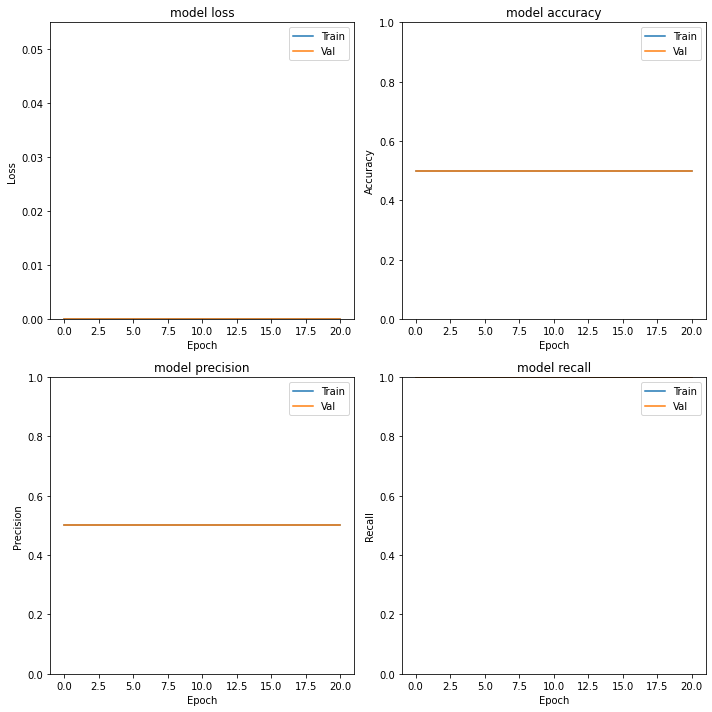

In [204]:
plot_metrics(CNN_model1_history)

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

#### **Plot Confusion Matrix - Model 1**

In [205]:
y_pred_test = cnn_model1.predict(CNN_X_test)
y_pred=[1 if i[0] >0.5 else 0 for i in y_pred_test.tolist()]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1300
           1       0.50      1.00      0.67      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



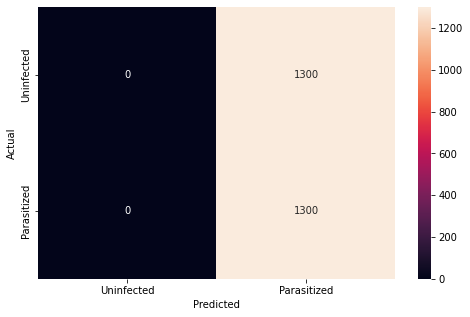

In [206]:
#importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report

print(classification_report(CNN_y_test,y_pred))

#Plotting the heatmap using confusion matrix

cm = confusion_matrix(CNN_y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

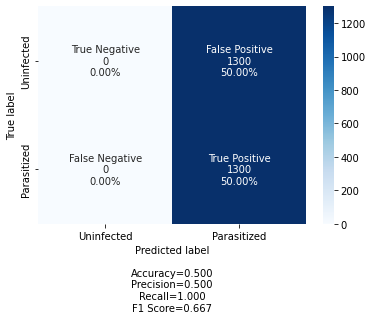

In [207]:
# Plotting Confusion Matrix
# Let's predict using default threshold

cm2=confusion_matrix(CNN_y_test,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Uninfected','Parasitized']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observations:**

* The CNN model has 103,089 Trainable parameters.
* 50 epochs were ran.
* Using the original dataset, the CNN model has NOT performed well with accuracy hovering around the 50th percentile in validation and test.
* The model is able to correctly identify all the parasitized cells but not the uninfected cells.
* Half of the dataset is a Type 1 error and there are zero Type 2 errors.
* This model requires a lot more refining and tuning work.
* A Transfer Learning solution might be the answer.

**<font color=lightblue>==============================================================================================================================================================================================================================</font>**

### **Split the HSV Data (Train and Test for the Convoluted Neural Network Model).**

In [208]:
CNN_X_train_hsv = imgData_hsv_train_normalized
CNN_y_train_hsv = train_labels

print(CNN_X_train_hsv.shape)
print(CNN_y_train_hsv.shape)


(24958, 64, 64, 3)
(24958,)


In [209]:
CNN_X_test_hsv = imgData_hsv_test_normalized
CNN_y_test_hsv = test_labels

print(CNN_X_test_hsv.shape)
print(CNN_y_test_hsv.shape)


(2600, 64, 64, 3)
(2600,)


### **CNN Model 2 - Basic Model - HSV Data.**

#### **Build and Train Model 2.**

In [210]:
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc2 = ModelCheckpoint('model2_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

no_of_classes = 1

cnn_model2 = Sequential()

# 1st CNN Layer
cnn_model2.add(Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3), padding = 'same'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.25))


# 2nd CNN Layer
cnn_model2.add(Conv2D(128, (3,3), activation='relu', padding = 'same'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.25))

# 3rd CNN Layer
cnn_model2.add(Conv2D(512, (3,3), activation='relu', padding = 'same'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.25))

# 4th CNN Layer
cnn_model2.add(Conv2D(512, (3,3), activation='relu', padding = 'same'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.25))

cnn_model2.add(Flatten())


# Fully connected 1st layer
cnn_model2.add(Dense(256, activation='relu'))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.25))

# Fully connected 2nd layer
cnn_model2.add(Dense(512, activation='relu'))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Dropout(0.25))


cnn_model2.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate = 0.0001)

# Compile the model.

cnn_model2.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy","Recall","Precision"])
cnn_model2.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 128)    

In [211]:
# Train the model.

CNN_model2_history=cnn_model2.fit(CNN_X_train_hsv, 
          CNN_y_train_hsv,  # It expects integers due to the sparse_categorical_crossentropy loss function.
          epochs=50, # Number of iterations over the entire dataset to train on.
          batch_size=64,validation_data = (CNN_X_test_hsv,CNN_y_test_hsv),callbacks=[es2, mc2],use_multiprocessing=True) # Number of samples per gradient update for training.

Epoch 1/50
389/390 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4999 - recall: 1.0000 - precision: 0.4999
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to model2_best_model.h5
390/390 [==============================] - 9s 18ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - recall: 1.0000 - precision: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 2/50
389/390 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5000 - recall: 1.0000 - precision: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
390/390 [==============================] - 6s 16ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - recall: 1.0000 - precision: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 3/50
389/390 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5002 - recall: 1.0000 - precision: 0.5002
Epoc

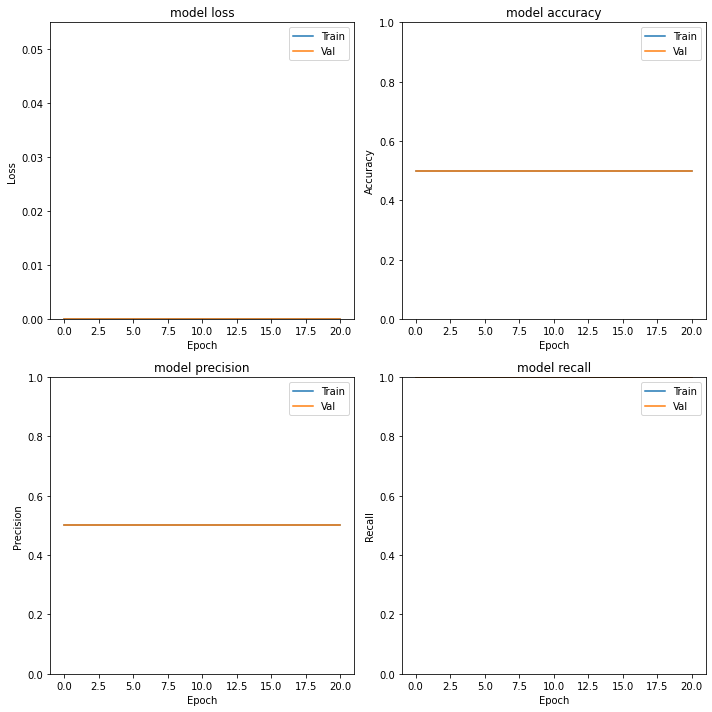

In [212]:
plot_metrics(CNN_model2_history)

#### **Plot Confusion Matrix - Model 2**

In [213]:
y_pred_test = cnn_model2.predict(CNN_X_test_hsv)
y_pred=[1 if i[0] >0.5 else 0 for i in y_pred_test.tolist()]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1300
           1       0.50      1.00      0.67      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



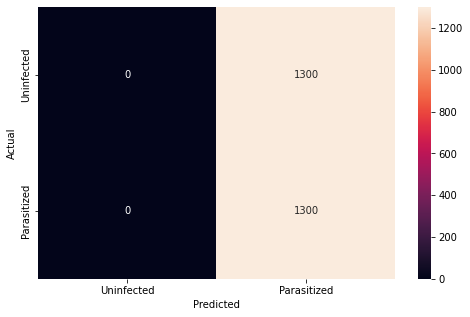

In [214]:
#importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report

print(classification_report(CNN_y_test_hsv,y_pred))

#Plotting the heatmap using confusion matrix

cm = confusion_matrix(CNN_y_test_hsv,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

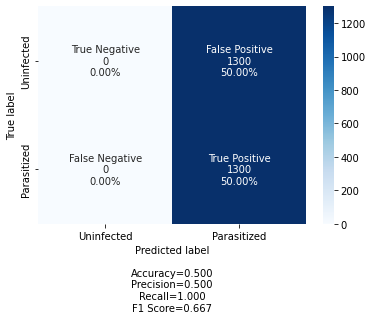

In [215]:
# Plotting Confusion Matrix
#Let's predict using default threshold

cm3=confusion_matrix(CNN_y_test_hsv,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Uninfected','Parasitized']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observations:**

* The CNN model has 101,937 Trainable parameters.
* 50 epochs were ran.
* Using the HSV dataset, the CNN model has NOT performed well with accuracy hovering around the 50th percentile in validation and test.
* The model is able to correctly identify all the parasitized cells but not the uninfected cells.
* Half of the dataset is a Type 1 error and there are zero Type 2 errors.
* This model requires a lot more refining and tuning work.
* A Transfer Learning solution might be the answer.

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Model Building Using Transfer Learning: VGG 16.</font>**

- Now, let's try again, but this time, using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and finished runner-up in the ImageNet competition in 2014. Below is a schematic of the VGG16 model.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. We will remove the already-present fully-connected layers and add our own fully-connected layers for this binary classification task.



![vgg16](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png)

In [216]:
# Summary of the whole model.

model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [217]:
# Getting only the conv layers for transfer learning.

transfer_layer = model.get_layer('block5_pool')
VGG_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [218]:
VGG_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

- To remove the fully-connected layers of the imported pre-trained model, while calling it from Keras we can also specify an additonal keyword argument that is **include_top**. 

- **If we specify include_top = False, then the model will be imported without the fully-connected layers.** Here we won't have to do the above steps of getting the last convolutional layer and creating a separate model.

- If we are specifying include_top = False, we will also have to specify our input image shape.

- Keras has this keyword argument as generally while importing a pre-trained CNN model, we don't require the fully-connected layers and we train our own fully-connected layers for our task.

In [219]:
VGG_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))   
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [220]:
# Making all the layers of the VGG16 model non-trainable. i.e. freezing them.

for layer in VGG_model.layers:
    layer.trainable = False

In [221]:
for layer in VGG_model.layers:
    print(layer.name, layer.trainable)

input_6 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [222]:
# Model for original dataset

TFRLRN_model = Sequential()

# Adding the convolutional part of the VGG16 model from above

TFRLRN_model.add(VGG_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer

TFRLRN_model.add(Flatten())

# Adding a dense output layer

TFRLRN_model.add(Dense(32, activation='relu'))
TFRLRN_model.add(Dense(32, activation='relu'))
TFRLRN_model.add(Dense(1, activation='sigmoid'))

In [223]:
# Model for hsv dataset

TFRLRN_model_hsv = Sequential()

# Adding the convolutional part of the VGG16 model from above

TFRLRN_model_hsv.add(VGG_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer

TFRLRN_model_hsv.add(Flatten())

# Adding a dense output layer

TFRLRN_model_hsv.add(Dense(32, activation='relu'))
TFRLRN_model_hsv.add(Dense(32, activation='relu'))
TFRLRN_model_hsv.add(Dense(1, activation='sigmoid'))

In [224]:
# Model for original dataset

TFRLRN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
TFRLRN_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_31 (Dense)            (None, 32)                65568     
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,781,345
Trainable params: 66,657
Non-trainable params: 14,714,688
_________________________________________________________________


In [225]:
# Model for hsv dataset

TFRLRN_model_hsv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
TFRLRN_model_hsv.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_34 (Dense)            (None, 32)                65568     
                                                                 
 dense_35 (Dense)            (None, 32)                1056      
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,781,345
Trainable params: 66,657
Non-trainable params: 14,714,688
_________________________________________________________________


In [226]:
# Original train dataset

TFR_X_train = imgData_original_train_normalized
TFR_y_train = train_labels

print(TFR_X_train.shape)
print(TFR_y_train.shape)

(24958, 64, 64, 3)
(24958,)


In [227]:
# HSV train dataset

TFR_X_train_hsv = imgData_hsv_train_normalized
TFR_y_train_hsv = train_labels

print(TFR_X_train_hsv.shape)
print(TFR_y_train_hsv.shape)

(24958, 64, 64, 3)
(24958,)


In [228]:
# Original test dataset

TFR_X_test = imgData_original_test_normalized
TFR_y_test = test_labels

print(TFR_X_test.shape)
print(TFR_y_test.shape)

(2600, 64, 64, 3)
(2600,)


In [229]:
# HSV test dataset

TFR_X_test_hsv = imgData_hsv_test_normalized
TFR_y_test_hsv = test_labels

print(TFR_X_test_hsv.shape)
print(TFR_y_test_hsv.shape)

(2600, 64, 64, 3)
(2600,)


In [230]:
# Original dataset

TFR_X_test, TFR_X_val, TFR_y_test, TFR_y_val = train_test_split(imgData_original_test_normalized, test_labels, test_size = 0.5, random_state=2)

print(TFR_X_test.shape)
print(TFR_X_val.shape)
print(TFR_y_test.shape)
print(TFR_y_val.shape)

(1300, 64, 64, 3)
(1300, 64, 64, 3)
(1300,)
(1300,)


In [231]:
# HSV dataset

TFR_X_test_hsv, TFR_X_val_hsv, TFR_y_test_hsv, TFR_y_val_hsv = train_test_split(imgData_hsv_test_normalized, test_labels, test_size = 0.5, random_state=2)

print(TFR_X_test_hsv.shape)
print(TFR_X_val_hsv.shape)
print(TFR_y_test_hsv.shape)
print(TFR_y_val_hsv.shape)

(1300, 64, 64, 3)
(1300, 64, 64, 3)
(1300,)
(1300,)


In [232]:
datagen1 = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90)

In [233]:
datagen1_hsv = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90)

In [234]:
datagen1.fit(TFR_X_train)

In [235]:
datagen1_hsv.fit(TFR_X_train_hsv)

In [236]:
## Fitting the VGG16 model - original dataset

TFRLRN_model_history = TFRLRN_model.fit(datagen1.flow(TFR_X_train, TFR_y_train),
                                        validation_data=(TFR_X_val, TFR_y_val),
                                        epochs=5)

Epoch 1/5
780/780 [==============================] - 29s 37ms/step - loss: 0.2723 - accuracy: 0.8882 - val_loss: 0.2314 - val_accuracy: 0.9200
Epoch 2/5
780/780 [==============================] - 28s 37ms/step - loss: 0.2167 - accuracy: 0.9158 - val_loss: 0.1910 - val_accuracy: 0.9308
Epoch 3/5
780/780 [==============================] - 28s 36ms/step - loss: 0.2101 - accuracy: 0.9185 - val_loss: 0.1907 - val_accuracy: 0.9292
Epoch 4/5
780/780 [==============================] - 28s 36ms/step - loss: 0.2006 - accuracy: 0.9221 - val_loss: 0.1868 - val_accuracy: 0.9292
Epoch 5/5
780/780 [==============================] - 28s 35ms/step - loss: 0.1981 - accuracy: 0.9247 - val_loss: 0.1734 - val_accuracy: 0.9354


In [237]:
## Fitting the VGG16 model - hsv dataset

TFRLRN_model_history_hsv = TFRLRN_model_hsv.fit(datagen1_hsv.flow(TFR_X_train_hsv, TFR_y_train_hsv),
                                        validation_data=(TFR_X_val_hsv, TFR_y_val_hsv),
                                        epochs=20)

Epoch 1/20
780/780 [==============================] - 29s 36ms/step - loss: 0.4770 - accuracy: 0.7697 - val_loss: 0.3905 - val_accuracy: 0.8277
Epoch 2/20
780/780 [==============================] - 27s 35ms/step - loss: 0.4077 - accuracy: 0.8134 - val_loss: 0.3770 - val_accuracy: 0.8308
Epoch 3/20
780/780 [==============================] - 28s 35ms/step - loss: 0.3911 - accuracy: 0.8201 - val_loss: 0.3606 - val_accuracy: 0.8308
Epoch 4/20
780/780 [==============================] - 28s 35ms/step - loss: 0.3840 - accuracy: 0.8236 - val_loss: 0.3476 - val_accuracy: 0.8454
Epoch 5/20
780/780 [==============================] - 27s 35ms/step - loss: 0.3739 - accuracy: 0.8278 - val_loss: 0.3649 - val_accuracy: 0.8285
Epoch 6/20
780/780 [==============================] - 27s 35ms/step - loss: 0.3700 - accuracy: 0.8306 - val_loss: 0.3402 - val_accuracy: 0.8477
Epoch 7/20
780/780 [==============================] - 27s 35ms/step - loss: 0.3704 - accuracy: 0.8332 - val_loss: 0.3913 - val_accuracy:

In [238]:
# Evaluating on the Test set - original dataset

TFRLRN_model.evaluate(TFR_X_test, TFR_y_test)

41/41 [==============================] - 0s 7ms/step - loss: 0.1811 - accuracy: 0.9246


[0.18109560012817383, 0.9246153831481934]

In [239]:
# Evaluating on the Test set - hsv dataset

TFRLRN_model_hsv.evaluate(TFR_X_test_hsv, TFR_y_test_hsv)

41/41 [==============================] - 0s 7ms/step - loss: 0.3015 - accuracy: 0.8608


[0.3014812767505646, 0.8607692122459412]

In [240]:
TFRLRN_model.save("TFRLRN_model.h5")

In [241]:
TFRLRN_model_hsv.save("TFRLRN_model_hsv.h5")

In [242]:
# Function to plot loss, val_loss, 

def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

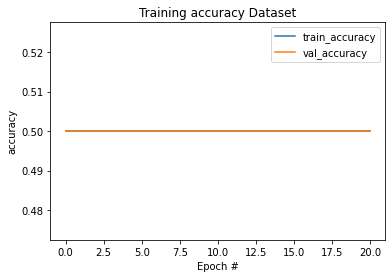

In [243]:
# Plotting the loss vs epoch curve for the basic CNN model without Transfer Learning

plot_history(CNN_model2_history)

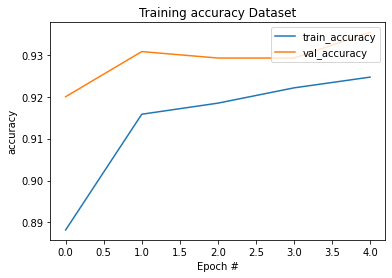

In [244]:
# Plotting the loss vs epoch curve for the original dataset Transfer Learning model,

plot_history(TFRLRN_model_history)

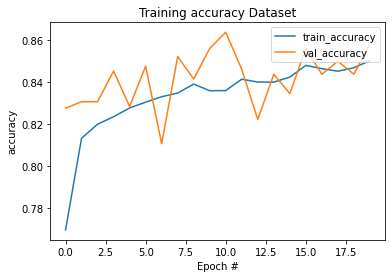

In [245]:
# Plotting the loss vs epoch curve for the hsv dataset Transfer Learning model,

plot_history(TFRLRN_model_history_hsv)

### Findings

- The first transfer model (VGG16) using the original dataset has 66,657 Trainable parameters.
- After running 5 epochs we were able to achieve a training accuracy of ~93% and a validation accuracy of ~ 94%.

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Model Building Using Transfer Learning: VGG 19.</font>**

* The VGG-19 model is a 19-layer (convolution and fully connected) deep learning network built on the ImageNet database, which is built for the purpose of image recognition and classification. 

* This model was built by Karen Simonyan and Andrew Zisserman and is mentioned in their paper titled ‘Very Deep Convolutional Networks for Large-Scale Image Recognition’. 

* The architecture of the VGG-19 model is depicted in the following figure.

![vgg19](https://miro.medium.com/max/1216/1*SYxBT4hxo65twqBNA2-BmQ.png)

In [246]:
# Summary of the whole model
model = VGG19(weights='imagenet')
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [247]:
# Getting only the conv layers for transfer learning.

transfer_layer = model.get_layer('block5_pool')
VGG_model2 = Model(inputs=model.input, outputs=transfer_layer.output)

In [248]:
VGG_model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

- To remove the fully-connected layers of the imported pre-trained model, while calling it from Keras we can also specify an additonal keyword argument that is **include_top**. 

- **If we specify include_top = False, then the model will be imported without the fully-connected layers.** Here we won't have to do the above steps of getting the last convolutional layer and creating a separate model.

- If we are specifying include_top = False, we will also have to specify our input image shape.

- Keras has this keyword argument as generally while importing a pre-trained CNN model, we don't require the fully-connected layers and we train our own fully-connected layers for our task.

In [249]:
VGG_model2 = VGG19(weights='imagenet', include_top = False, input_shape = (64,64,3))
VGG_model2.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [250]:
# Making all the layers of the VGG19 model non-trainable. i.e. freezing them

for layer in VGG_model2.layers:
    layer.trainable = False

In [251]:
for layer in VGG_model2.layers:
    print(layer.name, layer.trainable)

input_8 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_conv4 False
block5_pool False


In [252]:
TFRLRN_model2 = Sequential()

# Adding the convolutional part of the VGG16 model from above

TFRLRN_model2.add(VGG_model2)

# Flattening the output of the VGG16 model because it is from a convolutional layer

TFRLRN_model2.add(Flatten())

# Adding a dense output layer

TFRLRN_model2.add(Dense(32, activation='relu'))
TFRLRN_model2.add(Dense(32, activation='relu'))
TFRLRN_model2.add(Dense(1, activation='sigmoid'))

In [253]:
TFRLRN_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
TFRLRN_model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dense_37 (Dense)            (None, 32)                65568     
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,091,041
Trainable params: 66,657
Non-trainable params: 20,024,384
_________________________________________________________________


In [254]:
datagen2 = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90)

In [255]:
datagen2.fit(TFR_X_train)

In [256]:
## Fitting the VGG19 model

TFRLRN_model_history2 = TFRLRN_model2.fit(datagen2.flow(TFR_X_train, TFR_y_train),
                                        validation_data=(TFR_X_val, TFR_y_val),
                                        epochs=15)

Epoch 1/15
780/780 [==============================] - 27s 33ms/step - loss: 0.2912 - accuracy: 0.8796 - val_loss: 0.2749 - val_accuracy: 0.8900
Epoch 2/15
780/780 [==============================] - 25s 33ms/step - loss: 0.2418 - accuracy: 0.9055 - val_loss: 0.2330 - val_accuracy: 0.9023
Epoch 3/15
780/780 [==============================] - 26s 33ms/step - loss: 0.2272 - accuracy: 0.9115 - val_loss: 0.2230 - val_accuracy: 0.9092
Epoch 4/15
780/780 [==============================] - 25s 33ms/step - loss: 0.2176 - accuracy: 0.9154 - val_loss: 0.1909 - val_accuracy: 0.9262
Epoch 5/15
780/780 [==============================] - 25s 33ms/step - loss: 0.2110 - accuracy: 0.9189 - val_loss: 0.1910 - val_accuracy: 0.9254
Epoch 6/15
780/780 [==============================] - 25s 33ms/step - loss: 0.2110 - accuracy: 0.9171 - val_loss: 0.2077 - val_accuracy: 0.9169
Epoch 7/15
780/780 [==============================] - 26s 33ms/step - loss: 0.2066 - accuracy: 0.9193 - val_loss: 0.1879 - val_accuracy:

In [257]:
# Evaluating on the Test set

TFRLRN_model2.evaluate(TFR_X_test, TFR_y_test)

41/41 [==============================] - 0s 8ms/step - loss: 0.1828 - accuracy: 0.9238


[0.18277978897094727, 0.9238461256027222]

In [258]:
TFRLRN_model2.save("TFRLRN_model2.h5")

In [259]:
# Function to plot loss, val_loss, 

def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

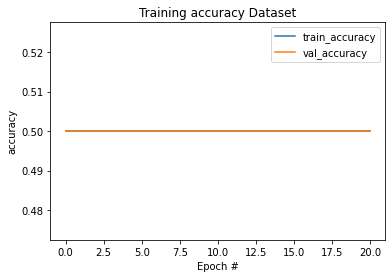

In [260]:
# Plotting the loss vs epoch curve for the basic CNN model without Transfer Learning

plot_history(CNN_model2_history)

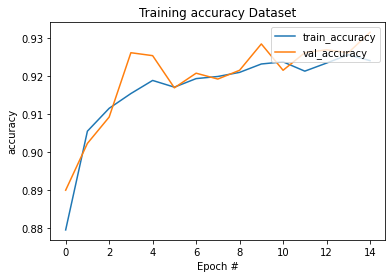

In [261]:
# Plotting the loss vs epoch curve for the Transfer Learning model

plot_history(TFRLRN_model_history2)

### Findings

- The second transfer model (VGG19) with the original dataset has 66,657 Trainable parameters.
- After running 15 epochs we were able to achieve a training accuracy of ~94% and a validation accuracy of ~ 92%.

**<font color=blue>==============================================================================================================================================================================================================================</font>**

## **<font color=purple>Business Recommendations</font>**

- The difference between the various models is evident. 

- However even after training the custom Convoluted Neural Network (CNN) models for 50 epochs, they could not attain accuracies as high as we achieved with Transfer Learning.

- The two Artificial Neural Network (ANN) models also performed well at 50 epochs on both the original dataset and the HSV dataset with accuracy, recall, and f1-score in the mid 90th percentiles. 

- The two Transfer Learning models have converged faster than the custom CNN models in only 5 and 15 epochs respectively.

- Transfer Learning resulted in accuracy scores of ~93% and ~93% respectively using the original dataset.

- That is a good level of improvement just by directly using pre-trained architectures such as VGG16 and VGG19.

- These Transfer Learning models can, in fact, further be tuned to achieve the accuracies required for practical applicability of malaria parasite identification in the medical domain.